<a href="https://colab.research.google.com/github/akbarfai-blub/Akbar-spring/blob/main/Customer_Segmentation_%26_Churn_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Repo
https://github.com/akbarfai-blub/Final-Project-Data-Science

# Setup & Persiapan Awal

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

folder_path = "/content/drive/MyDrive/Dibimbing/Final Project Phase 2/Final Project/Dataset/"

print("Mulai me-load dataset dari Google Drive... ")

customers = pd.read_csv(folder_path + 'olist_customers_dataset.csv')
geolocation = pd.read_csv(folder_path + 'olist_geolocation_dataset.csv')
order_items = pd.read_csv(folder_path + 'olist_order_items_dataset.csv')
payments = pd.read_csv(folder_path + 'olist_order_payments_dataset.csv')
reviews = pd.read_csv(folder_path + 'olist_order_reviews_dataset.csv')
orders = pd.read_csv(folder_path + 'olist_orders_dataset.csv')
products = pd.read_csv(folder_path + 'olist_products_dataset.csv')
sellers = pd.read_csv(folder_path + 'olist_sellers_dataset.csv')
translation = pd.read_csv(folder_path + 'product_category_name_translation.csv')

print("Semua dataset berhasil di-load!")


customers.head()

Mulai me-load dataset dari Google Drive... 
Semua dataset berhasil di-load!


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


# Data Cleaning & Preparation

## Inspeksi Awal & Data Understanding

In [ ]:
all_dfs = {
    "customers": customers, "geolocation": geolocation, "order_items": order_items,
    "payments": payments, "reviews": reviews, "orders": orders,
    "products": products, "sellers": sellers, "translation": translation
}

for name, df in all_dfs.items():
    print(f"==============================================")
    print(f"🕵️  Analisis Tabel: {name}")
    print(f"==============================================")

    # Pilar 1: Kesehatan Teknis
    print("\n(1) Info dan Tipe Data:")
    df.info()

    # Pilar 2: Intip Isi Data
    print(f"\n(2) Lima Baris Pertama:")
    display(df.head())

    # Pilar 3: Skala dan Variasi
    print(f"\n(3) Statistik Deskriptif (untuk kolom numerik):")
    display(df.describe())

    print(f"\n(4) Jumlah Nilai Unik per Kolom:")
    display(df.nunique())

    print("\n\n")

🕵️  Analisis Tabel: customers

(1) Info dan Tipe Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

(2) Lima Baris Pertama:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP



(3) Statistik Deskriptif (untuk kolom numerik):


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000



(4) Jumlah Nilai Unik per Kolom:


,0
customer_id,99441
customer_unique_id,96096
customer_zip_code_prefix,14994
customer_city,4119
customer_state,27





🕵️  Analisis Tabel: geolocation

(1) Info dan Tipe Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB

(2) Lima Baris Pertama:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP



(3) Statistik Deskriptif (untuk kolom numerik):


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02



(4) Jumlah Nilai Unik per Kolom:


,0
geolocation_zip_code_prefix,19015
geolocation_lat,717360
geolocation_lng,717613
geolocation_city,8011
geolocation_state,27





🕵️  Analisis Tabel: order_items

(1) Info dan Tipe Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

(2) Lima Baris Pertama:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



(3) Statistik Deskriptif (untuk kolom numerik):


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000



(4) Jumlah Nilai Unik per Kolom:


,0
order_id,98666
order_item_id,21
product_id,32951
seller_id,3095
shipping_limit_date,93318
price,5968
freight_value,6999





🕵️  Analisis Tabel: payments

(1) Info dan Tipe Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

(2) Lima Baris Pertama:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45



(3) Statistik Deskriptif (untuk kolom numerik):


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000



(4) Jumlah Nilai Unik per Kolom:


,0
order_id,99440
payment_sequential,29
payment_type,5
payment_installments,24
payment_value,29077





🕵️  Analisis Tabel: reviews

(1) Info dan Tipe Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB

(2) Lima Baris Pertama:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53



(3) Statistik Deskriptif (untuk kolom numerik):


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000



(4) Jumlah Nilai Unik per Kolom:


,0
review_id,98410
order_id,98673
review_score,5
review_comment_title,4527
review_comment_message,36159
review_creation_date,636
review_answer_timestamp,98248





🕵️  Analisis Tabel: orders

(1) Info dan Tipe Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

(2) Lima Baris Pertama:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



(3) Statistik Deskriptif (untuk kolom numerik):


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522



(4) Jumlah Nilai Unik per Kolom:


,0
order_id,99441
customer_id,99441
order_status,8
order_purchase_timestamp,98875
order_approved_at,90733
order_delivered_carrier_date,81018
order_delivered_customer_date,95664
order_estimated_delivery_date,459





🕵️  Analisis Tabel: products

(1) Info dan Tipe Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

(2) Lima Baris Pertama:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0



(3) Statistik Deskriptif (untuk kolom numerik):


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000



(4) Jumlah Nilai Unik per Kolom:


,0
product_id,32951
product_category_name,73
product_name_lenght,66
product_description_lenght,2960
product_photos_qty,19
product_weight_g,2204
product_length_cm,99
product_height_cm,102
product_width_cm,95





🕵️  Analisis Tabel: sellers

(1) Info dan Tipe Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB

(2) Lima Baris Pertama:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP



(3) Statistik Deskriptif (untuk kolom numerik):


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000



(4) Jumlah Nilai Unik per Kolom:


,0
seller_id,3095
seller_zip_code_prefix,2246
seller_city,611
seller_state,23





🕵️  Analisis Tabel: translation

(1) Info dan Tipe Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB

(2) Lima Baris Pertama:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor



(3) Statistik Deskriptif (untuk kolom numerik):


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1



(4) Jumlah Nilai Unik per Kolom:


,0
product_category_name,71
product_category_name_english,71


## Pra-pemrosesan & Pembersihan Data (Sebelum Merge)

In [ ]:
# Konversi Tipe Data Tanggal pada tabel 'orders'
print("Mengonversi kolom tanggal... ")
datetime_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in datetime_cols:
  orders[col] = pd.to_datetime(orders[col])

# Pengangan Missing values di Tabel 'products'
print("Menangani missing values pada tabel produk...")
products['product_category_name'].fillna('unknown')
# Mengisi kolom numerik produk yang kosong dengan nilai 0
product_numeric_cols = [
    'product_name_lenght', 'product_description_lenght', 'product_photos_qty',
    'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'
]

for col in product_numeric_cols:
    products[col].fillna(0)

print("Pra-pemrosesan selesai.\n")

Mengonversi kolom tanggal... 
Menangani missing values pada tabel produk...
Pra-pemrosesan selesai.



## Penggabungan Data (Merge)

In [ ]:
print("Memulai proses penggabungan (merging) tabel...")

# Gabungkan 6 tabel kunci yang relevan
main_df = pd.merge(orders, order_items, on='order_id', how='left')
main_df = pd.merge(main_df, payments, on='order_id', how='left')
main_df = pd.merge(main_df, customers, on='customer_id', how='left')
main_df = pd.merge(main_df, products, on='product_id', how='left')
main_df = pd.merge(main_df, translation, on='product_category_name', how='left')

print("Proses merging selesai.\n")

Memulai proses penggabungan (merging) tabel...
Proses merging selesai.



In [ ]:
df_info = main_df.info()
print(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       118434 non-null  object        
 1   customer_id                    118434 non-null  object        
 2   order_status                   118434 non-null  object        
 3   order_purchase_timestamp       118434 non-null  datetime64[ns]
 4   order_approved_at              118258 non-null  datetime64[ns]
 5   order_delivered_carrier_date   116360 non-null  datetime64[ns]
 6   order_delivered_customer_date  115037 non-null  datetime64[ns]
 7   order_estimated_delivery_date  118434 non-null  datetime64[ns]
 8   order_item_id                  117604 non-null  float64       
 9   product_id                     117604 non-null  object        
 10  seller_id                      117604 non-null  object        
 11  

## Pembersihan Pasca Marge

In [ ]:
missing_payments = main_df['payment_type'].isna().sum()
print(f"Jumlah missing payment_type: {missing_payments}")

Jumlah missing payment_type: 3


In [ ]:
# Drop duplicate rows (just to be sure)
before = main_df.shape[0]
main_df.drop_duplicates(inplace=True)
print(f"Dropped {before - main_df.shape[0]} duplicate rows.")

Dropped 0 duplicate rows.


In [ ]:
# Re-check column type consistency (khusus untuk shipping_limit_date)
main_df['shipping_limit_date'] = pd.to_datetime(main_df['shipping_limit_date'], errors='coerce')

In [ ]:
print(main_df['shipping_limit_date'].isna().sum())

830


In [ ]:
main_df[main_df['shipping_limit_date'].isna()]['order_status'].value_counts()

,count
order_status,
unavailable,643
canceled,179
created,5
invoiced,2
shipped,1


In [ ]:
print("Memulai pembersihan pasca-merge...")

# Hapus baris order yang tidak memiliki detail produk (order gagal/kosong)
initial_rows = len(main_df)
main_df.dropna(subset=['product_id'], inplace=True)
print(f"Menghapus {initial_rows - len(main_df)} baris order kosong.")

# Isi sisa missing value yang mungkin ada setelah merge
main_df['product_category_name_english'] = main_df['product_category_name_english'].fillna('unknown')

# Hapus sisa missing value minor pada data pembayaran
main_df.dropna(subset=['payment_type'], inplace=True)


print("Pembersihan pasca-merge selesai.")
print("\n--- Info DataFrame Final (main_df) ---")
main_df.info()

Memulai pembersihan pasca-merge...
Menghapus 830 baris order kosong.
Pembersihan pasca-merge selesai.

--- Info DataFrame Final (main_df) ---
<class 'pandas.core.frame.DataFrame'>
Index: 117601 entries, 0 to 118433
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117601 non-null  object        
 1   customer_id                    117601 non-null  object        
 2   order_status                   117601 non-null  object        
 3   order_purchase_timestamp       117601 non-null  datetime64[ns]
 4   order_approved_at              117586 non-null  datetime64[ns]
 5   order_delivered_carrier_date   116356 non-null  datetime64[ns]
 6   order_delivered_customer_date  115034 non-null  datetime64[ns]
 7   order_estimated_delivery_date  117601 non-null  datetime64[ns]
 8   order_item_id                  117601 non-null  float64       
 9  

# Exploratory Data Analysis (EDA)

## PROFIL PASAR: SIAPA & APA YANG MEREKA BELI?

### Top 10 states dengan jumlah customer terbanyak

/tmp/ipython-input-3619919122.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_states.values, y=top_10_states.index, palette='viridis')


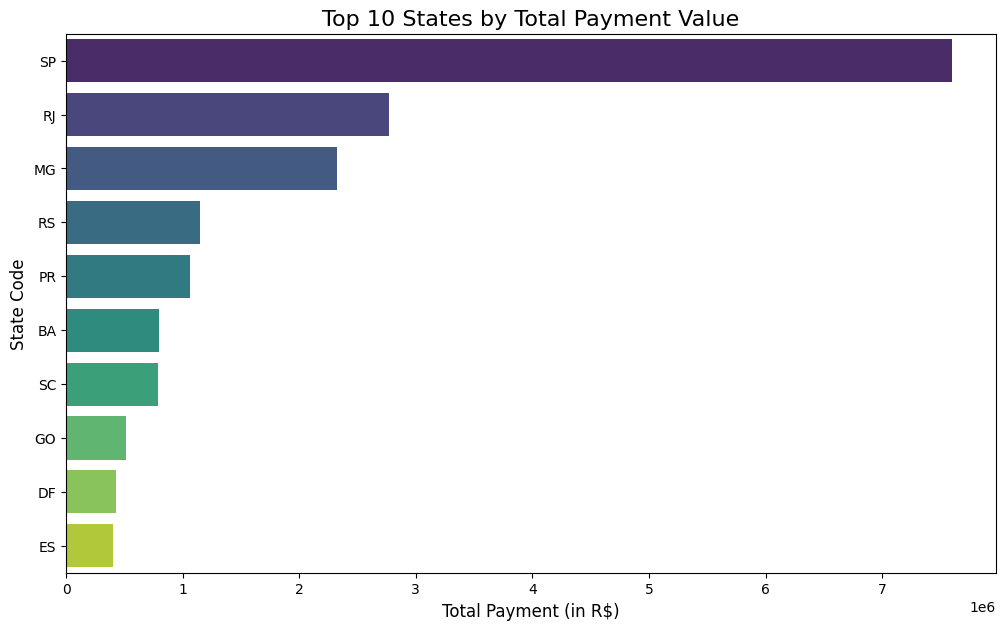

In [ ]:
# Analisis Top 10 Negara Bagian berdasarkan Total Penjualan
top_10_states = main_df.groupby('customer_state')['payment_value'].sum().nlargest(10)
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_states.values, y=top_10_states.index, palette='viridis')
plt.title('Top 10 States by Total Payment Value', fontsize=16)
plt.xlabel('Total Payment (in R$)', fontsize=12)
plt.ylabel('State Code', fontsize=12)
plt.show()

* SP (São Paulo) sangat dominan – jumlah customer-nya hampir 3x lipat dibandingkan state berikutnya.

* Ada pola bahwa wilayah tenggara Brazil (SP, RJ, MG) adalah pusat utama customer.

* State seperti GO dan ES masih punya pangsa kecil — bisa jadi area ekspansi potensial atau memang aksesnya terbatas.

### Top 10 Kategori Produk berdasarkan Total Penjualan

/tmp/ipython-input-3540327783.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette='plasma')


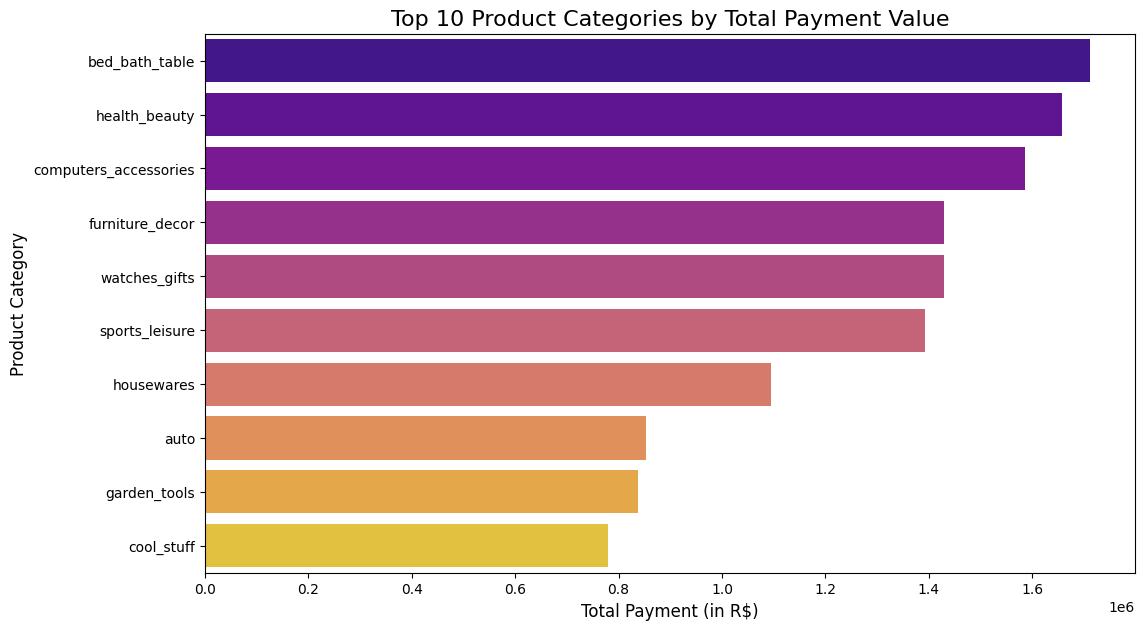

In [ ]:
# Analisis Top 10 Kategori Produk berdasarkan Total Penjualan
top_10_categories = main_df.groupby('product_category_name_english')['payment_value'].sum().nlargest(10)
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette='plasma')
plt.title('Top 10 Product Categories by Total Payment Value', fontsize=16)
plt.xlabel('Total Payment (in R$)', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.show()

jika kita lihat apa yang dibeli oleh para pelanggan ini, kategori teratas adalah perlengkapan rumah (bed_bath_table), kesehatan & kecantikan, serta aksesoris komputer dan furnitur. Ini menunjukkan bahwa target pasar utama Olist adalah konsumen umum yang mencari produk untuk kebutuhan sehari-hari dan hobi.

## POLA PERILAKU BELANJA PELANGGAN

### Analisis Penjualan Berdasarkan Hari

/tmp/ipython-input-953711560.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette='mako')


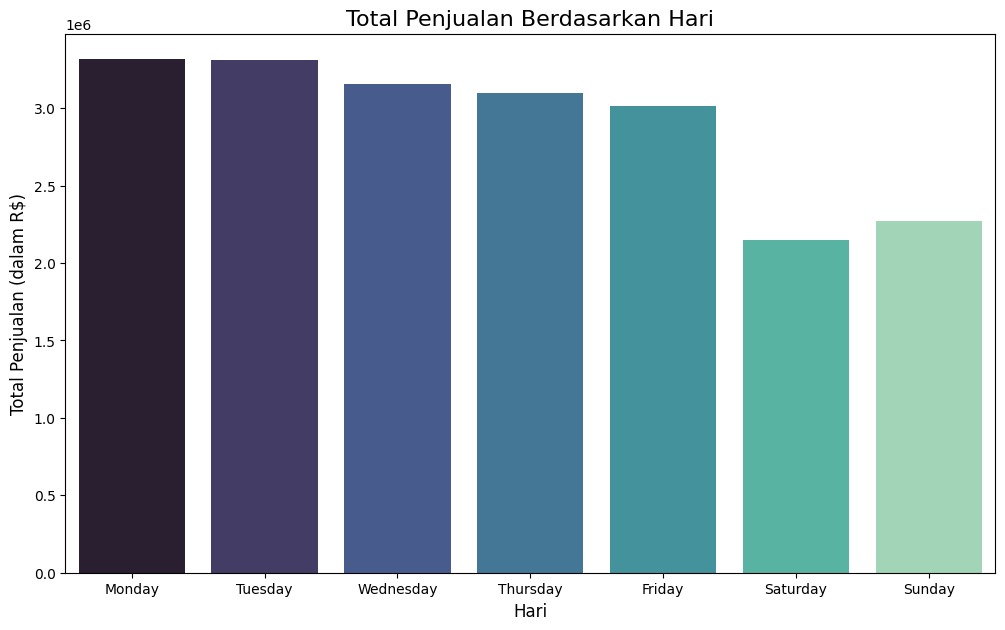

In [ ]:
# Analisis Penjualan Berdasarkan Hari
main_df['purchase_day'] = main_df['order_purchase_timestamp'].dt.day_name()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sales_by_day = main_df.groupby('purchase_day')['payment_value'].sum().reindex(day_order)
plt.figure(figsize=(12, 7))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette='mako')
plt.title('Total Penjualan Berdasarkan Hari', fontsize=16)
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Total Penjualan (dalam R$)', fontsize=12)
plt.show()

### Analisis Metode Pembayaran

/tmp/ipython-input-2295797452.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_value_by_payment.index, y=avg_value_by_payment.values, palette='rocket')


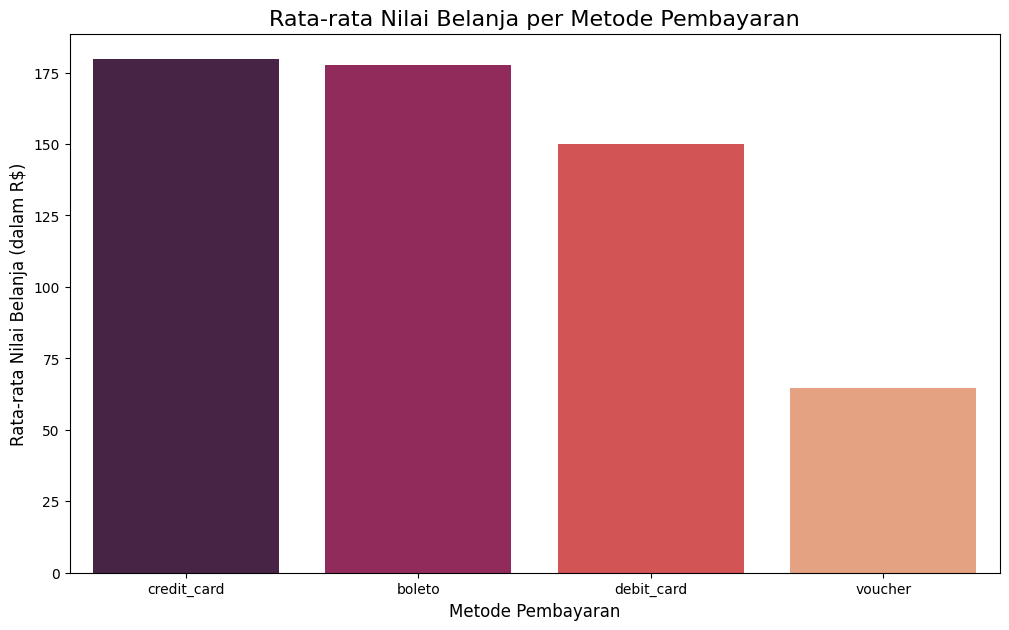

In [ ]:
# Analisis Metode Pembayaran
avg_value_by_payment = main_df.groupby('payment_type')['payment_value'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 7))
sns.barplot(x=avg_value_by_payment.index, y=avg_value_by_payment.values, palette='rocket')
plt.title('Rata-rata Nilai Belanja per Metode Pembayaran', fontsize=16)
plt.xlabel('Metode Pembayaran', fontsize=12)
plt.ylabel('Rata-rata Nilai Belanja (dalam R$)', fontsize=12)
plt.show()

### Analisis Hubungan Durasi Pengiriman dengan Skor Ulasan

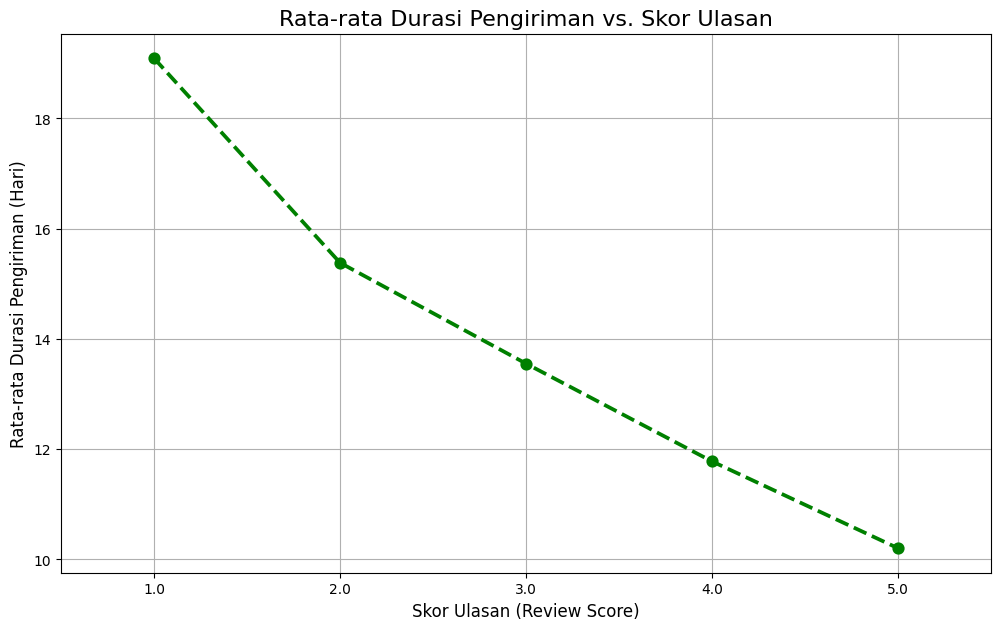

In [ ]:
# Analisis Hubungan Durasi Pengiriman dengan Skor Ulasan
# Gabungkan dengan data ulasan jika belum ada
if 'review_score' not in main_df.columns:
    reviews_subset = reviews[['order_id', 'review_score']]
    main_df = pd.merge(main_df, reviews_subset, on='order_id', how='left')

# Buat fitur durasi pengiriman jika belum ada
if 'delivery_duration' not in main_df.columns:
    main_df['delivery_duration'] = (main_df['order_delivered_customer_date'] - main_df['order_purchase_timestamp']).dt.days

avg_delivery_by_score = main_df.groupby('review_score')['delivery_duration'].mean()
plt.figure(figsize=(12, 7))
sns.pointplot(x=avg_delivery_by_score.index, y=avg_delivery_by_score.values, color='green', linestyles="--")
plt.title('Rata-rata Durasi Pengiriman vs. Skor Ulasan', fontsize=16)
plt.xlabel('Skor Ulasan (Review Score)', fontsize=12)
plt.ylabel('Rata-rata Durasi Pengiriman (Hari)', fontsize=12)
plt.grid(True)
plt.show()

### Analisis Pengiriman baik tapi review kurang baik

Top 10 Kategori Produk dengan Rata-rata Skor Ulasan Terendah (untuk Pengiriman Tepat Waktu):


,mean,count
product_category_name_english,,
office_furniture,3.62,1622
fashion_male_clothing,3.70,134
fixed_telephony,3.73,259
construction_tools_safety,3.91,188
unknown,3.96,1575
furniture_bedroom,3.96,118
art,4.00,202
bed_bath_table,4.01,10914
furniture_decor,4.03,8055


/tmp/ipython-input-2149274702.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


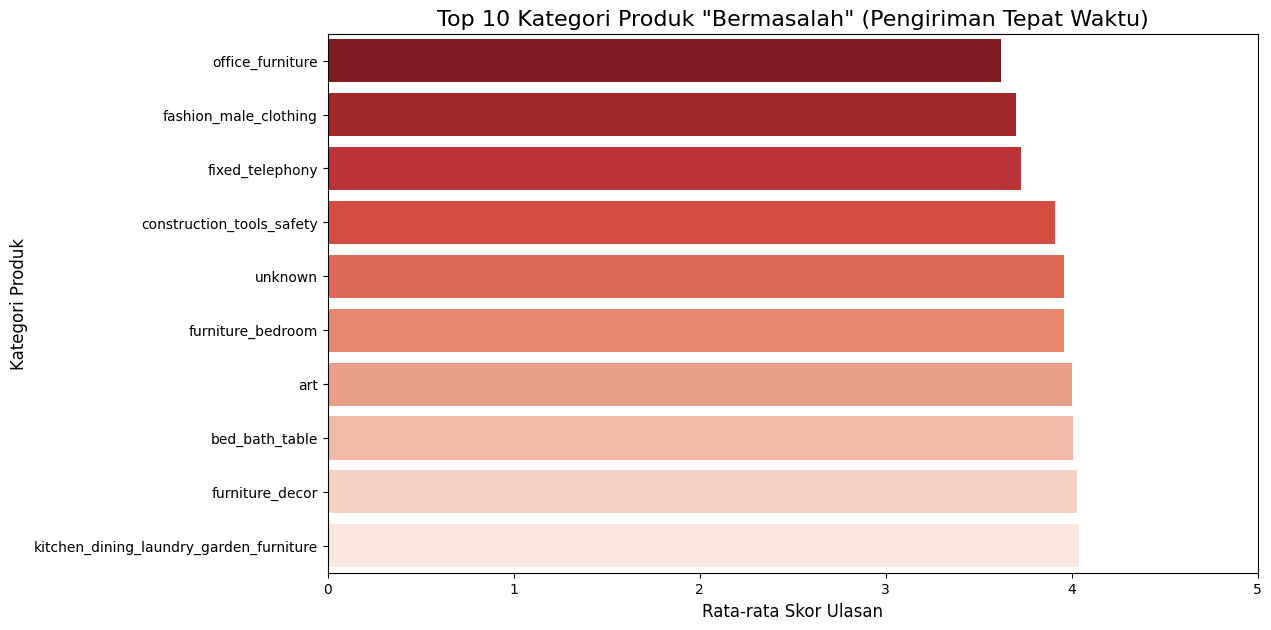

In [ ]:
# memastikan main_df sudah memiliki kolom 'is_late' dan 'review_score'
if 'is_late' not in main_df.columns:
    main_df['is_late'] = (main_df['order_delivered_customer_date'] > main_df['order_estimated_delivery_date']).astype(int)
if 'review_score' not in main_df.columns:
    reviews_subset = reviews[['order_id', 'review_score']]
    main_df = pd.merge(main_df, reviews_subset, on='order_id', how='left')

# Ambil data pesanan yang tidak terlambat
on_time_deliveries = main_df[main_df['is_late'] == 0]

# Hitung rata-rata skor ulasan per kategori produk
product_satisfaction = on_time_deliveries.groupby('product_category_name_english')['review_score'].agg(['mean', 'count']).round(2)

# Filter untuk kategori dengan jumlah ulasan yang signifikan (misal > 50) lalu urutkan
problematic_categories = product_satisfaction[product_satisfaction['count'] > 50].sort_values(by='mean', ascending=True)

# Tampilkan 10 kategori produk dengan skor kepuasan terendah
print("Top 10 Kategori Produk dengan Rata-rata Skor Ulasan Terendah (untuk Pengiriman Tepat Waktu):")
display(problematic_categories.head(10))

# Visualisasi
plt.figure(figsize=(12, 7))
sns.barplot(
    x=problematic_categories.head(10)['mean'],
    y=problematic_categories.head(10).index,
    palette='Reds_r'
)
plt.title('Top 10 Kategori Produk "Bermasalah" (Pengiriman Tepat Waktu)', fontsize=16)
plt.xlabel('Rata-rata Skor Ulasan', fontsize=12)
plt.ylabel('Kategori Produk', fontsize=12)
plt.xlim(0, 5)
plt.show()

# Segmentasi Pelanggan

In [ ]:
# MEMBUAT DATA FRAME RFM

snapshot_date = main_df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

rfm_df = main_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days, # Recency
    'order_id': 'nunique',                                             # Frequency
    'payment_value': 'sum'                                             # Monetary
})

rfm_df.rename(columns={'order_purchase_timestamp': 'Recency',
                           'order_id': 'Frequency',
                           'payment_value': 'Monetary'}, inplace=True)

print("DataFrame RFM berhasil dibuat!")
display(rfm_df.head())

DataFrame RFM berhasil dibuat!


,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19
0000f46a3911fa3c0805444483337064,542,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62
0004aac84e0df4da2b147fca70cf8255,293,1,196.89


### Analisis Skala Masalah Retensi (Pie Chart)

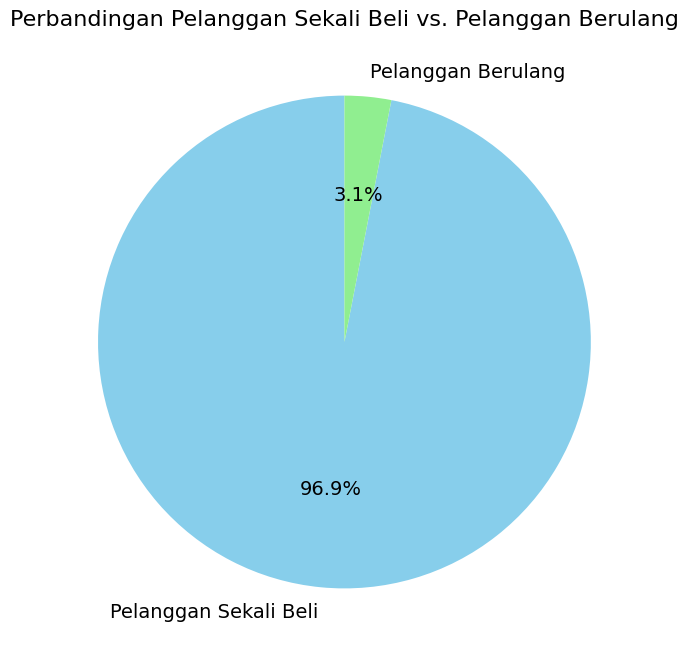

In [ ]:
# Analisis Skala Masalah Retensi (Pie Chart)
rfm_df['customer_type'] = rfm_df['Frequency'].apply(lambda x: 'Pelanggan Berulang' if x > 1 else 'Pelanggan Sekali Beli')
repeat_counts = rfm_df['customer_type'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(
    repeat_counts,
    labels=repeat_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightgreen'],
    textprops={'fontsize': 14}
)
plt.title('Perbandingan Pelanggan Sekali Beli vs. Pelanggan Berulang', fontsize=16)
plt.show()

Mayoritas pelanggan Olist hanya melakukan 1 kali pembelian. Hanya sekitar 3% pelanggan yang kembali melakukan pembelian lebih dari sekali, mengindikasikan rendahnya retensi pelanggan dan kemungkinan tantangan dalam membangun loyalitas.

## EDA PADA SKOR RFM

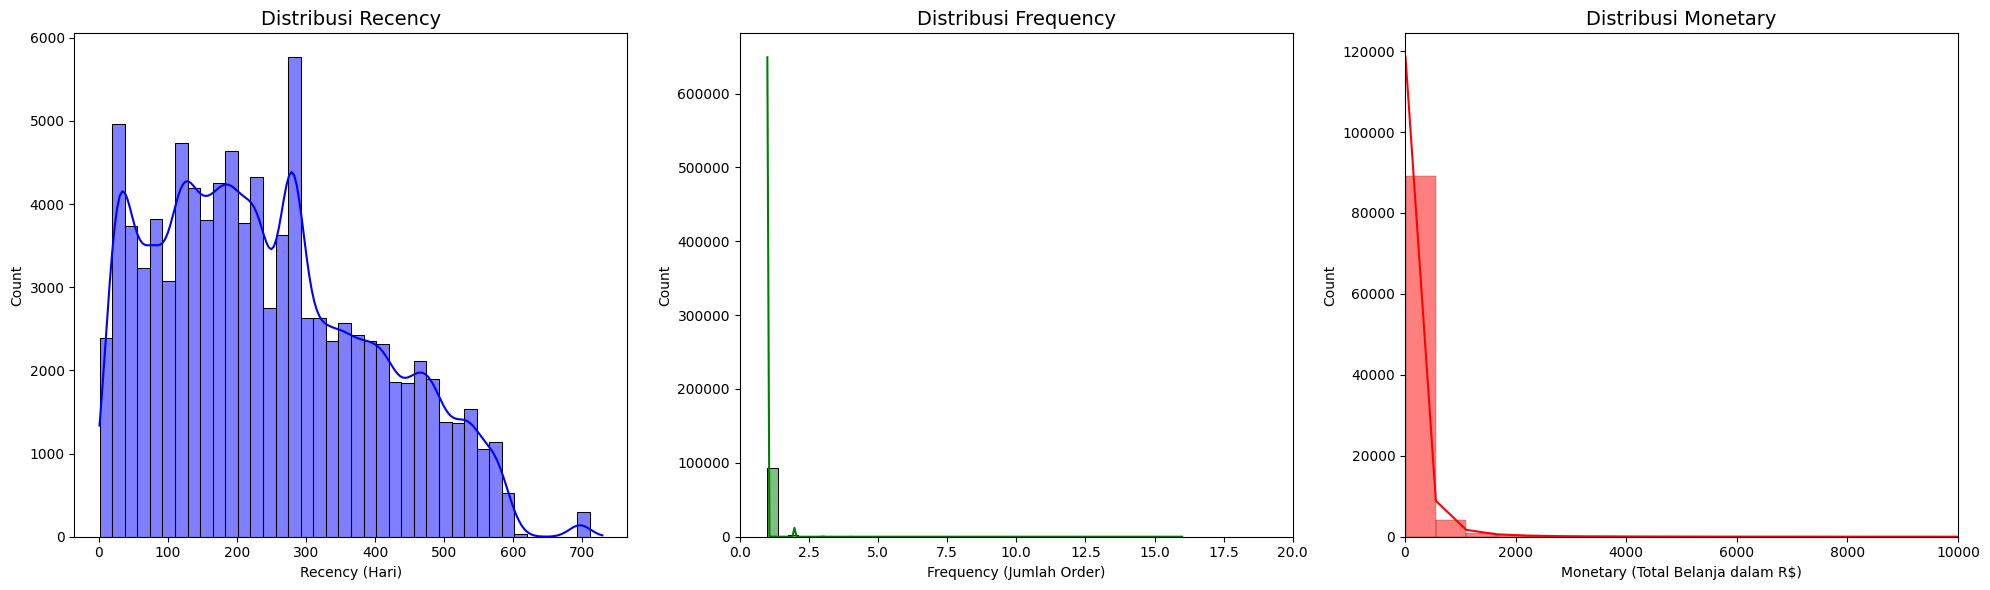


Statistik Deskriptif untuk Skor RFM:


,Recency,Frequency,Monetary
count,95419.000000,95419.000000,95419.000000
mean,243.595406,1.034018,213.970410
std,153.153422,0.211235,645.760476
min,1.000000,1.000000,9.590000
25%,119.000000,1.000000,63.990000
50%,224.000000,1.000000,113.330000
75%,353.000000,1.000000,203.300000
max,729.000000,16.000000,109312.640000


In [ ]:
# Membuat visualisasi distribusi untuk setiap metrik RFM
plt.figure(figsize=(20, 6))

# Plot untuk Recency
plt.subplot(1, 3, 1)
sns.histplot(rfm_df['Recency'], bins=40, kde=True, color='blue')
plt.title('Distribusi Recency', fontsize=14)
plt.xlabel('Recency (Hari)')

# Plot untuk Frequency
plt.subplot(1, 3, 2)
sns.histplot(rfm_df['Frequency'], bins=40, kde=True, color='green')
plt.title('Distribusi Frequency', fontsize=14)
plt.xlabel('Frequency (Jumlah Order)')
plt.xlim(0, 20)

# Plot untuk Monetary
plt.subplot(1, 3, 3)
sns.histplot(rfm_df['Monetary'], bins=200, kde=True, color='red')
plt.title('Distribusi Monetary', fontsize=14)
plt.xlabel('Monetary (Total Belanja dalam R$)')
plt.xlim(0, 10000)

plt.tight_layout()
plt.show()

# Menampilkan statistik deskriptif dari skor RFM
print("\nStatistik Deskriptif untuk Skor RFM:")
display(rfm_df.describe())

**Dari Grafik Distribusi (Histogram)**
*   Recency: Terdistribusi cukup merata — artinya ada kombinasi pelanggan baru & lama. Ini sinyal positif untuk retensi.
*   Frequency & Monetary: Keduanya sangat miring ke kanan.
    * Mayoritas pelanggan hanya melakukan 1 kali transaksi dan membelanjakan sangat sedikit.
    * Ini mendukung hipotesis utama: "Sebagian besar pelanggan hanya beli sekali lalu pergi."

* Dari Tabel Statistik Deskriptif (.describe())
    * 75% pelanggan hanya membeli sekali → terbukti dari kuartil ke-3 (75% = 1) di kolom Frequency.
    * Rata-rata Monetary jauh lebih tinggi dari median → ada minoritas pelanggan “kelas kakap” dengan pengeluaran sangat besar (hingga R$ 109K!) yang mengerek rata-rata.


## ANALISIS LOYALITAS GEOGRAFIS


Top 10 Negara Bagian dengan Tingkat Retensi Pelanggan Tertinggi:


customer_type,Pelanggan Berulang,Pelanggan Sekali Beli,total_customers,retention_rate_%
customer_state,,,,
AC,4,73,77,5.194805
RO,9,225,234,3.846154
RJ,414,11882,12296,3.366949
MT,29,843,872,3.325688
GO,62,1879,1941,3.194230
SP,1266,38707,39973,3.167138
RS,164,5085,5249,3.124405
AL,12,388,400,3.000000
MG,335,10840,11175,2.997763


/tmp/ipython-input-3872660800.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


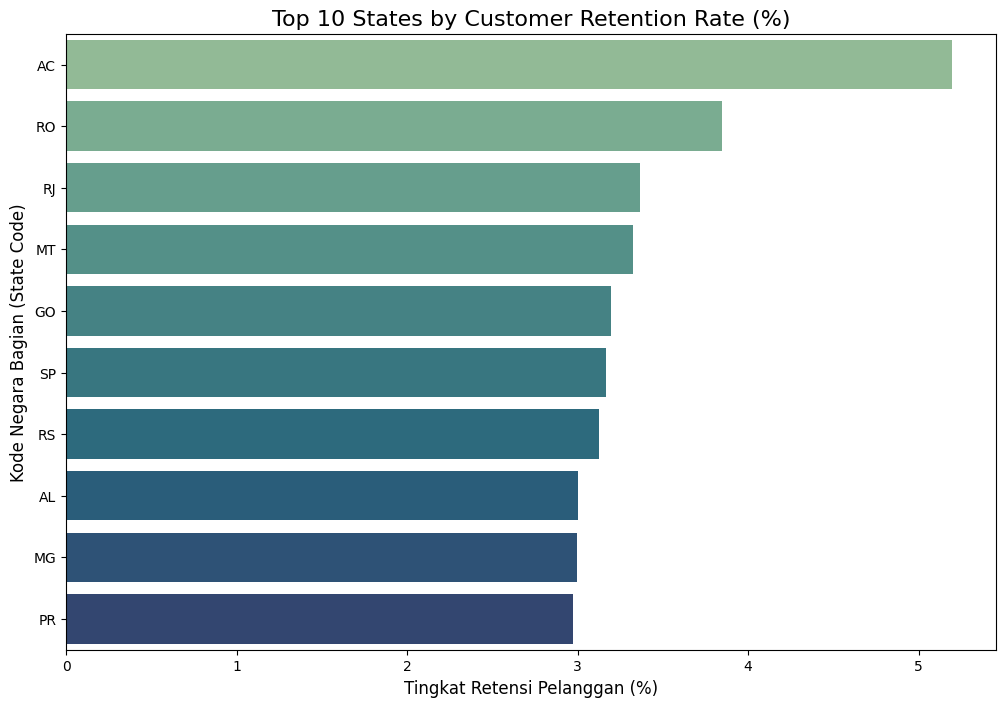

In [ ]:
# drop_duplicates() penting untuk memastikan setiap customer hanya punya satu lokasi
customer_state_map = customers[['customer_unique_id', 'customer_state']].drop_duplicates(subset=['customer_unique_id'])

# Gabung informasi state ke rfm_df
if 'customer_type' not in rfm_df.columns:
  rfm_df['customer_type'] = rfm_df['Frequency'].apply(lambda x: 'Repeat Customer' if x > 1 else 'One-Time Customer')

rfm_with_state = pd.merge(rfm_df, customer_state_map, on='customer_unique_id')

# Hitung jumpalh setiap tipe pelanggan per negara bagian pake crosstab
loyalty_by_state = pd.crosstab(
    index=rfm_with_state['customer_state'],
    columns=rfm_with_state['customer_type']
)

# Hitung metrik tambahan: total pelanggan dan tingkat retensi
loyalty_by_state['total_customers'] = loyalty_by_state['Pelanggan Sekali Beli'] + loyalty_by_state['Pelanggan Berulang']
loyalty_by_state['retention_rate_%'] = (loyalty_by_state['Pelanggan Berulang'] / loyalty_by_state['total_customers']) * 100

# Filter untuk negara bagian dengan jumlah pelanggan yang signifikan (> 50) lalu urutkan
top_loyal_states = loyalty_by_state[loyalty_by_state['total_customers'] > 50].sort_values(by='retention_rate_%', ascending=False)

# Tampilkan tabel hasilnya
print("\nTop 10 Negara Bagian dengan Tingkat Retensi Pelanggan Tertinggi:")
display(top_loyal_states.head(10))

# visualisasi
plt.figure(figsize=(12, 8))
sns.barplot(
    x=top_loyal_states.head(10)['retention_rate_%'],
    y=top_loyal_states.head(10).index,
    palette='crest'
)
plt.title('Top 10 States by Customer Retention Rate (%)', fontsize=16)
plt.xlabel('Tingkat Retensi Pelanggan (%)', fontsize=12)
plt.ylabel('Kode Negara Bagian (State Code)', fontsize=12)
plt.show()



*   Contoh Kasus: Lihat AC (Acre). Mereka punya tingkat retensi tertinggi (5.2%), tapi ini berasal dari sampel yang sangat kecil (hanya 4 dari 77 pelanggan yang kembali). Sebaliknya, SP (São Paulo), pasar terbesar kita, punya tingkat retensi yang lebih rendah (3.16%), tapi jumlah absolut pelanggan loyalnya jauh lebih besar (1,266 orang).
*   Hipotesis Bisnis: Ini bisa jadi karena tingkat persaingan e-commerce di wilayah yang lebih kecil lebih rendah. Pelanggan di sana mungkin punya lebih sedikit pilihan, sehingga mereka cenderung lebih loyal pada satu platform yang sudah mereka percaya.



Analisis loyalitas geografis kami menunjukkan sebuah temuan menarik. Wilayah dengan persentase pelanggan loyal tertinggi bukanlah pasar terbesar kami. Ini membuka peluang strategis: kita bisa mempelajari apa yang membuat pelanggan di wilayah kecil lebih loyal, dan di saat yang sama, ada potensi besar untuk meningkatkan tingkat retensi di pasar utama kita seperti São Paulo, di mana sedikit saja peningkatan akan berdampak besar pada pendapatan.



## Analisis Retensi Pelanggan (COhort Analysis)

### Heatmap Retensi

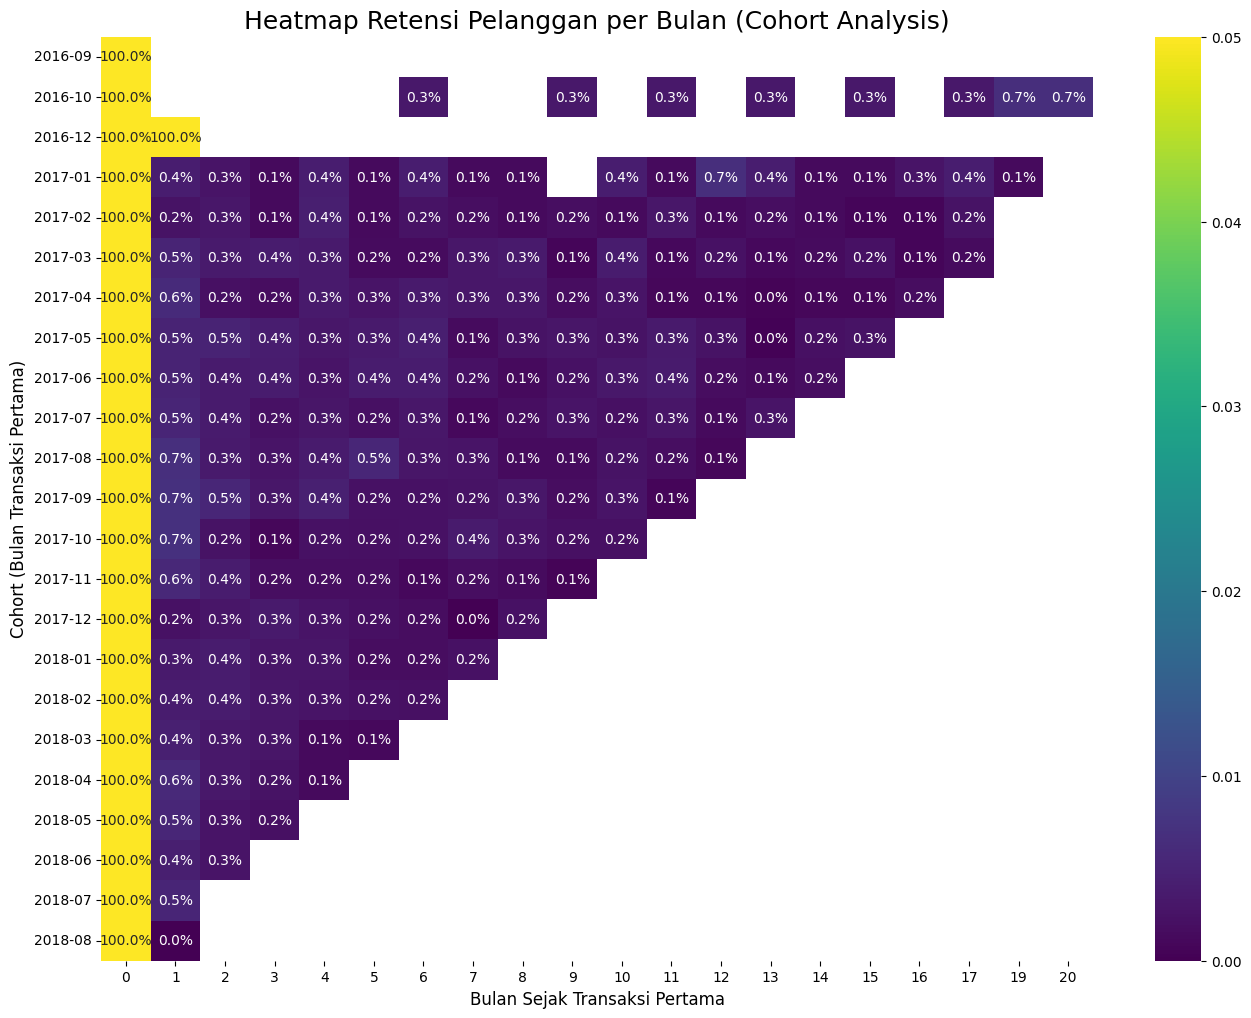

In [ ]:
# Persiapakan Data Cohort
cohort_df = main_df[['customer_unique_id', 'order_purchase_timestamp']].copy()

# Buat kolom InvoiceMonth (bulan terjadinya transaksi)
cohort_df['InvoiceMonth'] = cohort_df['order_purchase_timestamp'].dt.to_period('M')

# Buat kolom CohortMonth (bulan pertama kali customer bertransaksi)
cohort_df['CohortMonth'] = cohort_df.groupby('customer_unique_id')['InvoiceMonth'].transform('min')

# Hitung Cohort Index
def get_cohort_index(df, event_month_col='InvoiceMonth', first_month_col='CohortMonth'):
    """Menghitung selisih bulan untuk cohort index."""
    year_diff = df[event_month_col].dt.year - df[first_month_col].dt.year
    month_diff = df[event_month_col].dt.month - df[first_month_col].dt.month
    return year_diff * 12 + month_diff

cohort_df['CohortIndex'] = get_cohort_index(cohort_df)

# Agregasi Data untuk Pivot Table
# hitung jumlah pelanggan unik untuk setiap cohort dan cohort index
cohort_counts = cohort_df.groupby(['CohortMonth', 'CohortIndex'])['customer_unique_id'].nunique().reset_index()

# Buat Pivot Table
cohort_pivot = cohort_counts.pivot_table(index='CohortMonth',
                                         columns='CohortIndex',
                                         values='customer_unique_id')

# Hitung Tingkat Retensi (%)
# Ambil ukuran awal setiap cohort (jumlah pelanggan di bulan pertama / CohortIndex = 0)
cohort_sizes = cohort_pivot.iloc[:, 0]

# Bagi setiap nilai di pivot table dengan ukuran cohortnya untuk mendapatkan persentase
retention_matrix = cohort_pivot.divide(cohort_sizes, axis=0)


# Visualisasikan
plt.figure(figsize=(16, 12))
sns.heatmap(
    retention_matrix,
    annot=True,
    fmt='.1%',
    cmap='viridis',
    vmin=0.0,
    vmax=0.05
)
plt.title('Heatmap Retensi Pelanggan per Bulan (Cohort Analysis)', fontsize=18)
plt.xlabel('Bulan Sejak Transaksi Pertama', fontsize=12)
plt.ylabel('Cohort (Bulan Transaksi Pertama)', fontsize=12)
plt.show()




* Retensi Drop Drastis Setelah Bulan Pertama
  * Warna kuning cerah (100%) di bulan ke-0 langsung berubah ungu gelap di bulan ke-1.
  * Artinya: **>99% pelanggan tidak kembali di bulan kedua.** Perusahaan kehilangan hampir semua pelanggannya setelah pembelian pertama.
* Retensi Jangka Panjang Stabil, Tapi Kecil
  * Setelah bulan ke-1, warna retensi cenderung stabil di tiap baris.
  * Artinya: **Pelanggan yang “lolos” bulan pertama cenderung loyal**, meskipun jumlahnya sangat kecil.
* Masalah Retensi Kronis
  * Pola retensi dari cohort 2017–2018 hampir identik (tidak membaik).
  * Artinya: **Masalah retensi ini berlangsung lama & belum ada perbaikan nyata** dari waktu ke waktu.



Untuk menyelidiki masalah retensi lebih dalam, kami melakukan Cohort Analysis. Heatmap ini menunjukkan sebuah cerita yang sangat jelas: Olist menghadapi 'dinding' retensi yang sangat besar setelah pembelian pertama, di mana lebih dari 99% pelanggan hilang dan tidak kembali di bulan kedua.

Tantangan bisnis utamanya sangat jelas: Bagaimana cara membuat lebih banyak pelanggan melewati 'dinding' bulan pertama tersebut? Jawaban dari pertanyaan inilah yang akan kita coba cari melalui segmentasi dan pemodelan.

# Segmentasi

## Segmen berbasis aturan bisnis

--- Memulai Segmentasi Manual berdasarkan Aturan RFM ---
Segmentasi manual selesai. Kolom 'Segment' berhasil dibuat.


,Segment,Recency,Frequency,Monetary
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,New Customers,116,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,New Customers,119,1,27.19
0000f46a3911fa3c0805444483337064,Lost,542,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,Hibernating,326,1,43.62
0004aac84e0df4da2b147fca70cf8255,Hibernating,293,1,196.89


/tmp/ipython-input-1560421119.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


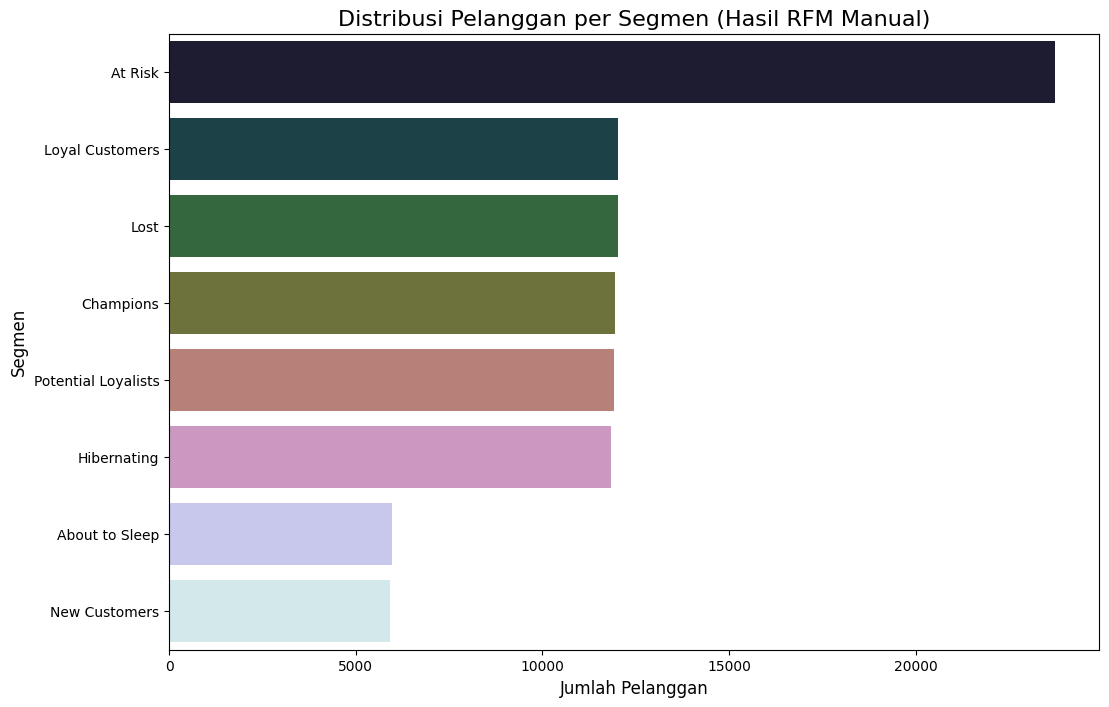

In [ ]:
print("--- Memulai Segmentasi Manual berdasarkan Aturan RFM ---")

#    Buat Skor Kuartil (1-4) untuk Setiap Metrik
#    Recency: nilai rendah lebih baik (skor 4)
#    Frequency & Monetary: nilai tinggi lebih baik (skor 4)
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 4, labels=[4, 3, 2, 1])
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 4, labels=[1, 2, 3, 4])

# Gabungkan Skor R dan F untuk membuat kode segmen
rfm_df['RF_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str)

# Buat dictionary untuk memetakan kode RF ke nama segmen
segment_map = {
    '44': 'Champions',          '43': 'Champions',
    '34': 'Loyal Customers',    '33': 'Loyal Customers',
    '42': 'Potential Loyalists','32': 'Potential Loyalists',
    '41': 'New Customers',      '31': 'About to Sleep',
    '24': 'At Risk',            '23': 'At Risk',
    '14': 'At Risk',            '13': 'At Risk',
    '22': 'Hibernating',        '21': 'Hibernating',
    '12': 'Lost',               '11': 'Lost'
}

# Buat kolom 'Segment' menggunakan .map()
rfm_df['Segment'] = rfm_df['RF_Score'].map(segment_map)

print("Segmentasi manual selesai. Kolom 'Segment' berhasil dibuat.")
display(rfm_df[['Segment', 'Recency', 'Frequency', 'Monetary']].head())

# Visualisasi Distribusi Segmen Manual
plt.figure(figsize=(12, 8))
sns.countplot(
    data=rfm_df,
    y='Segment',
    order=rfm_df['Segment'].value_counts().index,
    palette='cubehelix'
)
plt.title('Distribusi Pelanggan per Segmen (Hasil RFM Manual)', fontsize=16)
plt.xlabel('Jumlah Pelanggan', fontsize=12)
plt.ylabel('Segmen', fontsize=12)
plt.show()

,Recency,Frequency,Monetary,Customer_Count
Segment,,,,
Champions,62.32,1.08,230.86,11946
Loyal Customers,171.94,1.07,227.05,12035
Hibernating,282.99,1.00,217.02,11851
At Risk,370.02,1.06,214.10,23728
New Customers,62.64,1.00,205.88,5930
Lost,457.84,1.00,204.82,12023
Potential Loyalists,116.61,1.00,202.22,11930
About to Sleep,172.21,1.00,197.17,5976


/tmp/ipython-input-3548344004.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=sorted_segments, y=manual_segment_profile['Recency'].loc[sorted_segments], palette='viridis')
/tmp/ipython-input-3548344004.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=sorted_segments, y=manual_segment_profile['Frequency'].loc[sorted_segments], palette='plasma')
/tmp/ipython-input-3548344004.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[2], x=sorted_segments, y=manual_segment_profile['Monetary'].loc[sorted_se

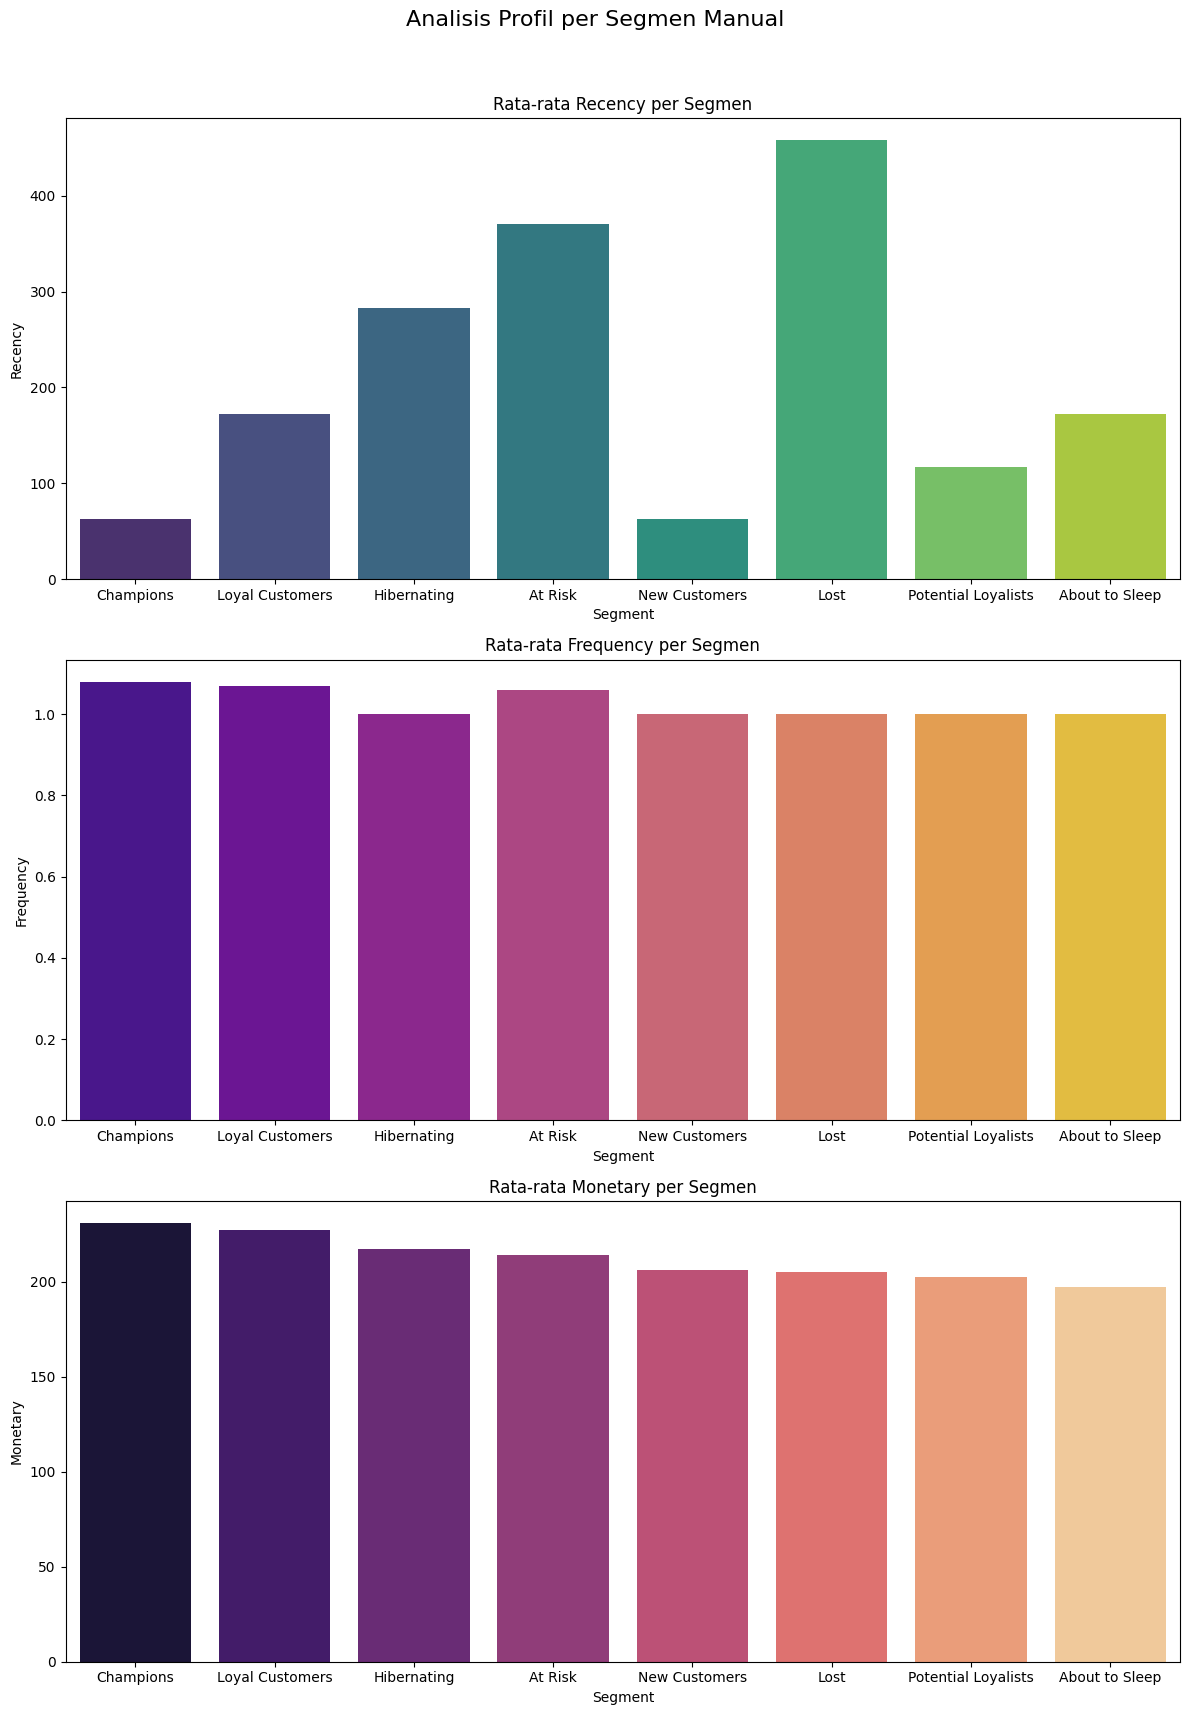

In [ ]:
# Hitung rata-rata R, F, M dan jumlah pelanggan untuk setiap segmen
manual_segment_profile = rfm_df.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Segment': 'count'  # Menghitung jumlah pelanggan di tiap segmen
}).rename(columns={'Segment': 'Customer_Count'}).round(2)

# Urutkan berdasarkan nilai Monetary untuk melihat segmen paling berharga
display(manual_segment_profile.sort_values(by='Monetary', ascending=False))

# Visualisasi untuk perbandingan yang lebih mudah
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
fig.suptitle('Analisis Profil per Segmen Manual', fontsize=16)

sorted_segments = manual_segment_profile.sort_values(by='Monetary', ascending=False).index

# Plot Rata-rata Recency
sns.barplot(ax=axes[0], x=sorted_segments, y=manual_segment_profile['Recency'].loc[sorted_segments], palette='viridis')
axes[0].set_title('Rata-rata Recency per Segmen')

# Plot Rata-rata Frequency
sns.barplot(ax=axes[1], x=sorted_segments, y=manual_segment_profile['Frequency'].loc[sorted_segments], palette='plasma')
axes[1].set_title('Rata-rata Frequency per Segmen')

# Plot Rata-rata Monetary
sns.barplot(ax=axes[2], x=sorted_segments, y=manual_segment_profile['Monetary'].loc[sorted_segments], palette='magma')
axes[2].set_title('Rata-rata Monetary per Segmen')

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

### 1. Champions & Loyal Customers = Pelanggan Terbaik  
- Memiliki Recency rendah, Frequency dan Monetary tinggi.  
- Artinya mereka baru bertransaksi, sering membeli, dan nilai pembelian besar.  
- Segmentasi ini sudah sesuai dengan perilaku aktual mereka.

### 2. Lost & Hibernating = Tidak Aktif  
- Recency tinggi (lama tidak transaksi), Frequency dan Monetary rendah.  
- Menunjukkan bahwa pelanggan ini tidak aktif atau bahkan sudah hilang.  
- Perlu pendekatan berbeda jika ingin diaktifkan kembali.

### 3. At Risk = Pelanggan Berharga yang Mulai Menjauh  
- Recency tinggi, tetapi Frequency dan Monetary masih cukup tinggi.  
- Menandakan mereka dulunya pelanggan baik, namun sudah lama tidak kembali.  
- Ini adalah kandidat ideal untuk kampanye re-engagement atau reminder.

--- Menganalisis Tren Segmentasi per Bulan ---


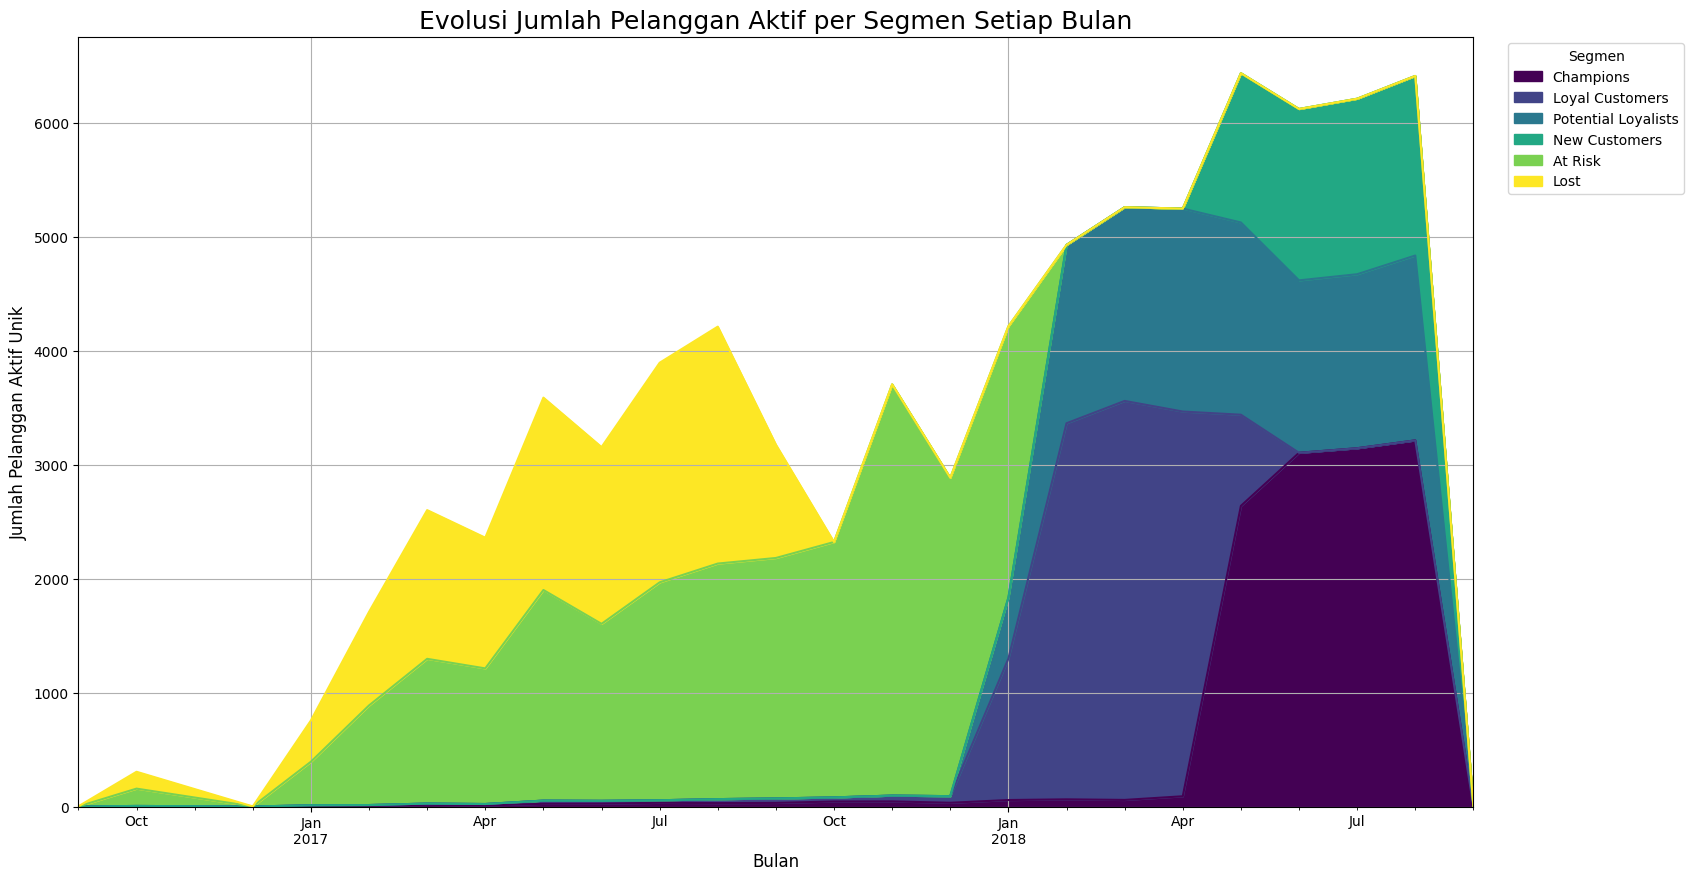

In [ ]:
print("--- Menganalisis Tren Segmentasi per Bulan ---")


main_df_final = pd.merge(
    main_df,
    rfm_df[['Segment']],
    on='customer_unique_id',
    how='left'
)

# Buat kolom InvoiceMonth (bulan terjadinya transaksi)
main_df_final['InvoiceMonth'] = main_df_final['order_purchase_timestamp'].dt.to_period('M')

# Hitung jumlah pelanggan unik yang aktif per segmen di setiap bulan
monthly_active_segments = main_df_final.groupby(['InvoiceMonth', 'Segment'])['customer_unique_id'].nunique().unstack(level='Segment')

# Isi nilai NaN (jika ada bulan tanpa pelanggan dari segmen tertentu) dengan 0
monthly_active_segments.fillna(0, inplace=True)

# Visualisasi dengan Stacked Area Chart
# Pilih segmen utama untuk ditampilkan agar tidak terlalu ramai
main_segments = ['Champions', 'Loyal Customers', 'Potential Loyalists', 'New Customers', 'At Risk', 'Lost']
monthly_active_segments[main_segments].plot(
    kind='area',
    stacked=True,
    figsize=(18, 10),
    cmap='viridis'
)

plt.title('Evolusi Jumlah Pelanggan Aktif per Segmen Setiap Bulan', fontsize=18)
plt.ylabel('Jumlah Pelanggan Aktif Unik', fontsize=12)
plt.xlabel('Bulan', fontsize=12)
plt.legend(title='Segmen', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True)
plt.show()

## Modeling: K-Means Clustering


--- Modeling K-Means Clustering ---


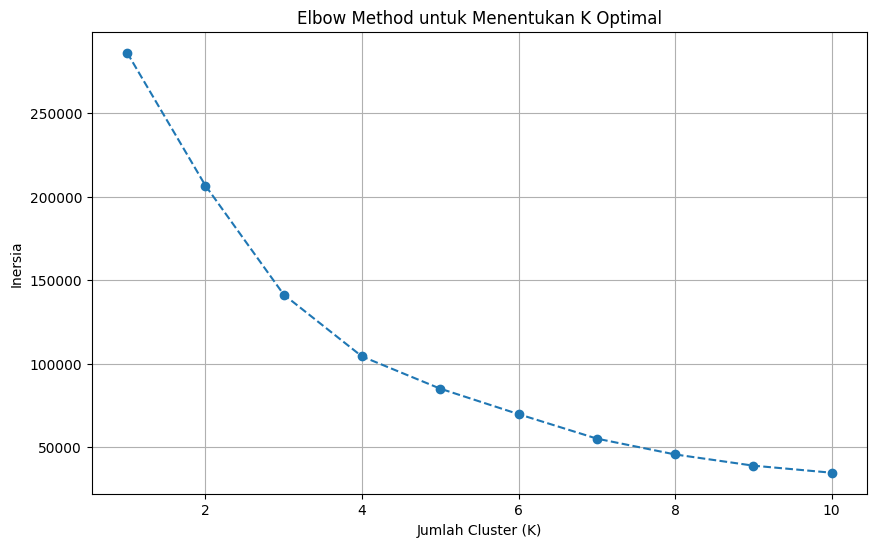

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

print("\n--- Modeling K-Means Clustering ---")

# Scaling Data
rfm_for_clustering = rfm_df[['Recency', 'Frequency', 'Monetary']]
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_for_clustering)
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=rfm_for_clustering.columns)

# Menentukan K Optimal dengan Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method untuk Menentukan K Optimal')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inersia')
plt.grid(True)
plt.show()

* Penurunan inersia dari K=3 ke K=4 masih cukup signifikan.
* Setelah K=4, garisnya mulai terlihat jauh lebih landai. Ini menandakan titik diminishing returns (penambahan cluster tidak lagi sepadan dengan hasilnya) yang baik
* Secara bisnis, 4 segmen seringkali sangat berguna: VIP, Loyal, Pelanggan Baru, dan Hilang/Berisiko. Ini memberikan granularitas yang baik.

In [ ]:
# Melatih Model Final dengan K=4 (berdasarkan hasil elbow)
final_kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
final_kmeans.fit(rfm_scaled_df)

# Tambahkan kolom cluster ke rfm_df
rfm_df['Cluster'] = final_kmeans.labels_
print("Model K-Means berhasil dilatih dan label cluster ditambahkan.")

Model K-Means berhasil dilatih dan label cluster ditambahkan.


## Analisis Pasca-Segmentasi: Membedah Cluster

In [ ]:
# Menganalisis Profil Rata-rata per Cluster
cluster_profile = rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(2)
print("\nProfil Rata-rata RFM per Cluster:")
display(cluster_profile.sort_values(by='Monetary', ascending=False))


Profil Rata-rata RFM per Cluster:


,Recency,Frequency,Monetary
Cluster,,,
2,218.68,1.27,26932.41
3,226.25,2.11,455.22
1,394.33,1.00,201.07
0,133.94,1.00,199.26


In [ ]:
# Memberi Nama Segmen yang Bermakna
cluster_map = {
    2: 'VIP/Champions',
    3: 'Loyal Customers',
    1: 'Lost/Hibernating',
    0: 'New/Regular Customers'
}

cluster_map = {
    cluster_profile.sort_values(by='Monetary', ascending=False).index[0]: 'VIP/Champions',
    cluster_profile.sort_values(by='Monetary', ascending=False).index[1]: 'Loyal Customers',
    cluster_profile.sort_values(by='Monetary', ascending=False).index[2]: 'New/Regular Customers',
    cluster_profile.sort_values(by='Monetary', ascending=False).index[3]: 'Lost/Hibernating'
}


rfm_df['Cluster_Label'] = rfm_df['Cluster'].map(cluster_map)

/tmp/ipython-input-2273873671.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


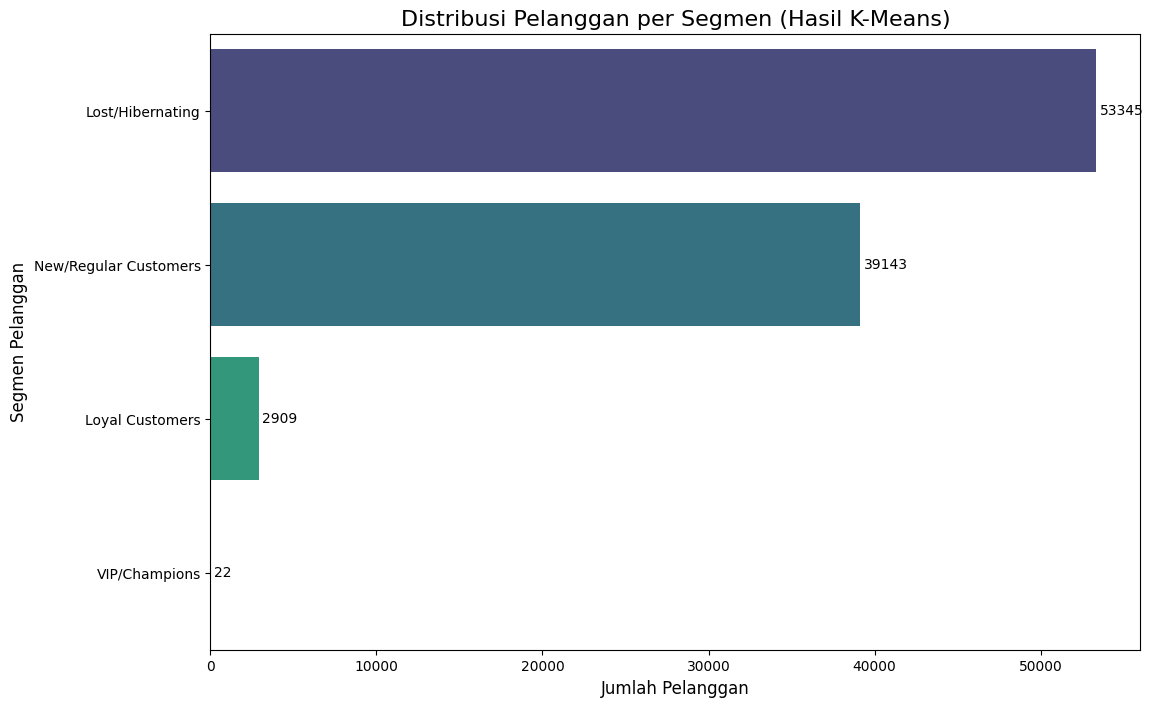

In [ ]:
# visualisasi bar chart horizontal
plt.figure(figsize=(12, 8))
# Simpan axes object dari plot agar kita bisa menambahkan teks
ax = sns.countplot(
    data=rfm_df,
    y='Cluster_Label',
    order=rfm_df['Cluster_Label'].value_counts().index,
    palette='viridis'
)


# Loop melalui setiap bar (patch) di dalam plot
for patch in ax.patches:

    width = patch.get_width()

    y = patch.get_y()
    height = patch.get_height()


    ax.text(
        x=width + 200,
        y=y + height / 2,
        s=f'{int(width)}',
        va='center'
    )


# judul dan label
plt.title('Distribusi Pelanggan per Segmen (Hasil K-Means)', fontsize=16)
plt.xlabel('Jumlah Pelanggan', fontsize=12)
plt.ylabel('Segmen Pelanggan', fontsize=12)

# Tampilkan plot
plt.show()

## Produk Favorit tiap Segmen

In [ ]:
main_df_final = pd.merge(
    main_df,
    rfm_df[['Cluster_Label']],
    on='customer_unique_id',
    how='left'
)

product_per_segment = pd.crosstab(
    index=main_df_final['product_category_name_english'],
    columns=main_df_final['Cluster_Label'],
    normalize="columns"
).mul(100).round(2)

# Tampilkan top 5 kategori untuk segmen yang paling menarik
print("\n--- Top 5 Kategori Produk untuk Segmen 'VIP/Champions' ---")
display(product_per_segment['VIP/Champions'].nlargest(5))

print("\n--- Top 5 Kategori Produk untuk Segmen 'Loyal Customers' ---")
display(product_per_segment['Loyal Customers'].nlargest(5))


--- Top 5 Kategori Produk untuk Segmen 'VIP/Champions' ---


,VIP/Champions
product_category_name_english,
computers_accessories,16.03
office_furniture,12.60
bed_bath_table,9.16
telephony,9.16
auto,7.63



--- Top 5 Kategori Produk untuk Segmen 'Loyal Customers' ---


,Loyal Customers
product_category_name_english,
bed_bath_table,15.54
furniture_decor,10.99
sports_leisure,9.13
computers_accessories,7.42
health_beauty,7.37


/tmp/ipython-input-244547916.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-244547916.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


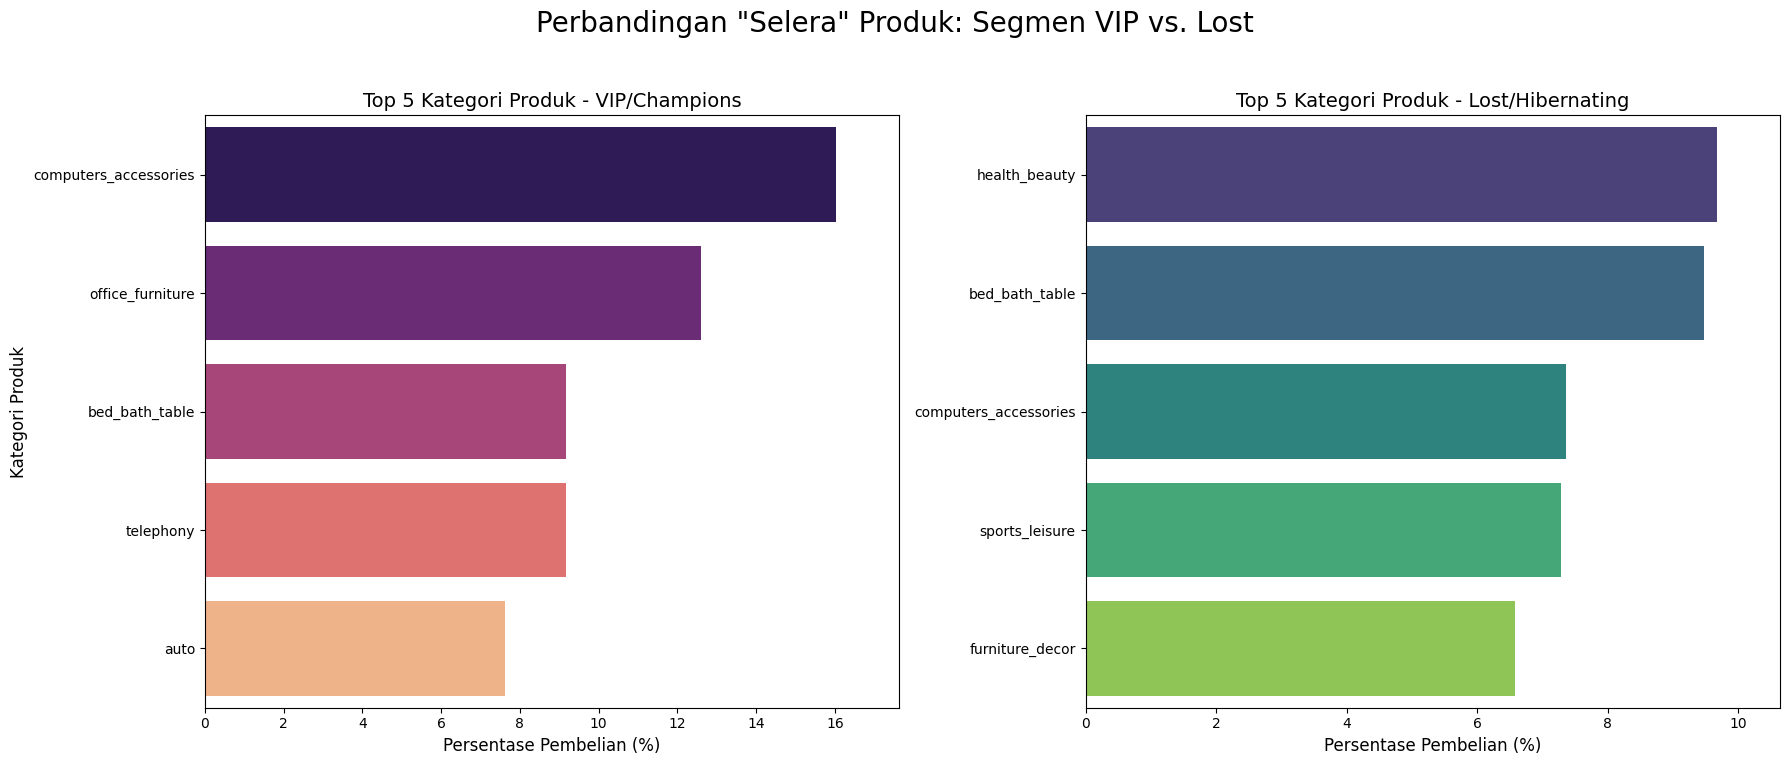

In [ ]:
vip_top5 = product_per_segment['VIP/Champions'].nlargest(5)
lost_top5 = product_per_segment['Lost/Hibernating'].nlargest(5)

# area plot dengan 2 kolom (satu untuk setiap segmen)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Perbandingan "Selera" Produk: Segmen VIP vs. Lost', fontsize=20)

# Plot untuk segmen VIP/Champions
sns.barplot(
    ax=axes[0],
    x=vip_top5.values,
    y=vip_top5.index,
    palette='magma'
)
axes[0].set_title('Top 5 Kategori Produk - VIP/Champions', fontsize=14)
axes[0].set_xlabel('Persentase Pembelian (%)', fontsize=12)
axes[0].set_ylabel('Kategori Produk', fontsize=12)
axes[0].set_xlim(0, max(vip_top5.values) * 1.1)

# Plot untuk segmen Lost/Hibernating
sns.barplot(
    ax=axes[1],
    x=lost_top5.values,
    y=lost_top5.index,
    palette='viridis'
)
axes[1].set_title('Top 5 Kategori Produk - Lost/Hibernating', fontsize=14)
axes[1].set_xlabel('Persentase Pembelian (%)', fontsize=12)
axes[1].set_ylabel('')
axes[1].set_xlim(0, max(lost_top5.values) * 1.1)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Perilaku Pembayaran tiap Segmen

In [ ]:
payment_per_segment = pd.crosstab(
    index=main_df_final['Cluster_Label'],
    columns=main_df_final['payment_type'],
    normalize="index"
).mul(100).round(2)

print("\nPersentase Penggunaan Metode Pembayaran per Segmen Pelanggan (%):")
display(payment_per_segment)


Persentase Penggunaan Metode Pembayaran per Segmen Pelanggan (%):


payment_type,boleto,credit_card,debit_card,voucher
Cluster_Label,,,,
Lost/Hibernating,18.61,74.90,1.91,4.58
Loyal Customers,19.26,71.99,1.09,7.66
New/Regular Customers,20.49,72.64,0.88,6.00
VIP/Champions,43.13,56.87,0.00,0.00


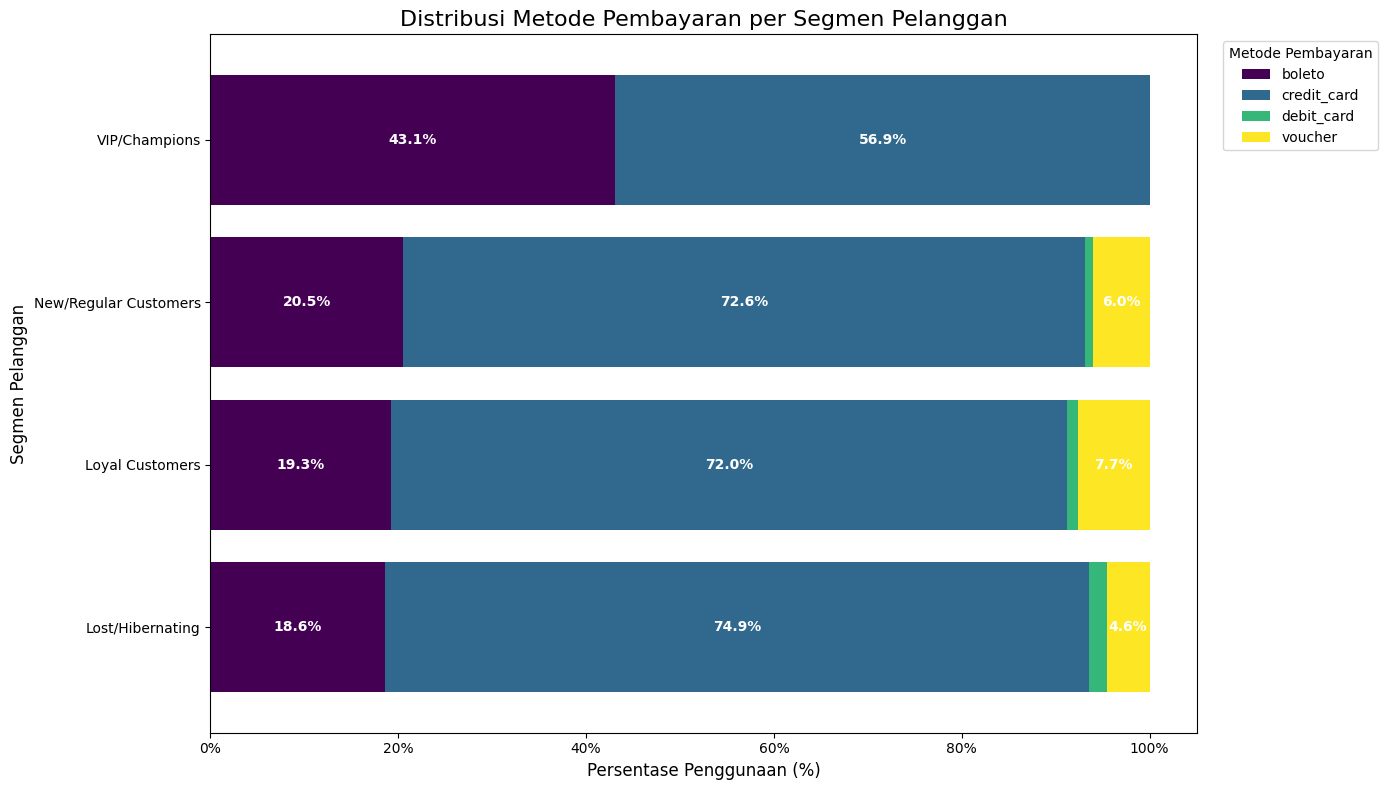

In [ ]:
ax = payment_per_segment.plot(
    kind='barh',
    stacked=True,
    figsize=(14, 8),
    cmap='viridis',
    width=0.8
)

# judul dan label
plt.title('Distribusi Metode Pembayaran per Segmen Pelanggan', fontsize=16)
plt.xlabel('Persentase Penggunaan (%)', fontsize=12)
plt.ylabel('Segmen Pelanggan', fontsize=12)
plt.legend(title='Metode Pembayaran', bbox_to_anchor=(1.02, 1), loc='upper left')

# Format sumbu x agar menampilkan simbol '%'
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

# label di dalam bar
for container in ax.containers:
    # Atur format label, jangan tampilkan jika nilainya terlalu kecil untuk dibaca
    labels = [f'{v.get_width():.1f}%' if v.get_width() > 3 else '' for v in container]

    ax.bar_label(container, labels=labels, label_type='center', color='white', weight='bold')

plt.tight_layout()
plt.show()

## Tingkat Kepuasan tiap Segmen


Rata-rata Skor Ulasan per Segmen Pelanggan:


,review_score
Cluster_Label,
Loyal Customers,4.10
New/Regular Customers,4.04
Lost/Hibernating,4.02
VIP/Champions,2.28


/tmp/ipython-input-66226387.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


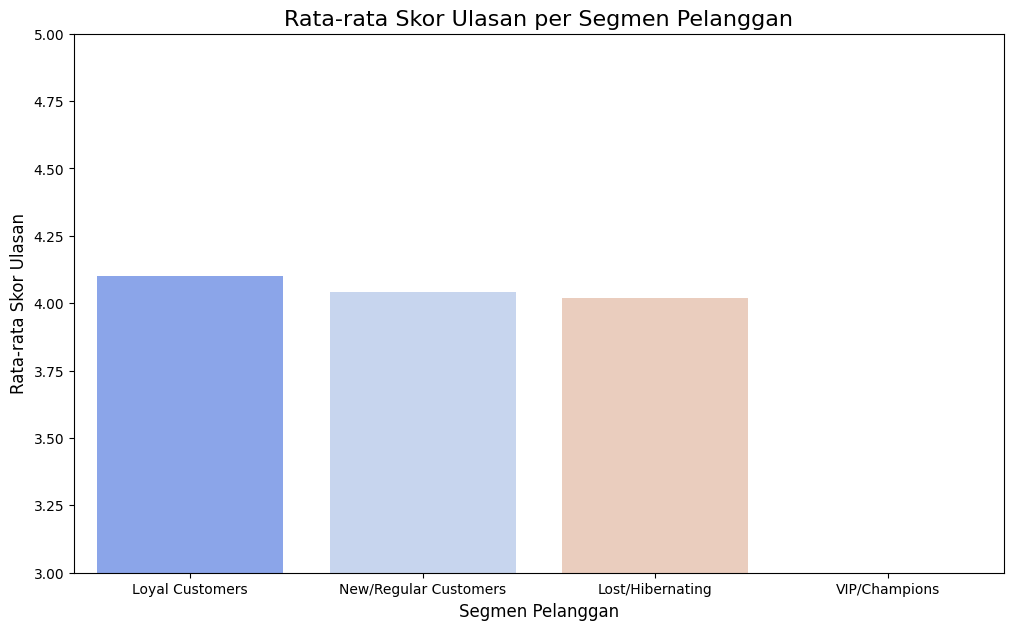

In [ ]:
# Hitung rata-rata skor ulasan untuk setiap segmen
satisfaction_by_segment = main_df_final.groupby('Cluster_Label')['review_score'].mean().round(2).sort_values(ascending=False)

# Tampilkan tabel hasilnya
print("\nRata-rata Skor Ulasan per Segmen Pelanggan:")
display(satisfaction_by_segment)

# Visualisasi
plt.figure(figsize=(12, 7))
sns.barplot(
    x=satisfaction_by_segment.index,
    y=satisfaction_by_segment.values,
    palette='coolwarm'
)
plt.title('Rata-rata Skor Ulasan per Segmen Pelanggan', fontsize=16)
plt.xlabel('Segmen Pelanggan', fontsize=12)
plt.ylabel('Rata-rata Skor Ulasan', fontsize=12)
plt.ylim(3, 5) # Atur limit y agar perbedaan lebih terlihat
plt.show()

## Average Order Value (AOV) per Segmen


Profil Segmen Termasuk Average Order Value (AOV):


,Recency,Frequency,Monetary,AOV
Segment_Name,,,,
VIP/Champions,218.68,1.27,26932.41,21206.622047
Loyal Customers,226.25,2.11,455.22,215.744076
New/Regular Customers,394.33,1.00,201.07,201.070000
Lost/Hibernating,133.94,1.00,199.26,199.260000


/tmp/ipython-input-1878432154.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  aov_plot = sns.barplot(


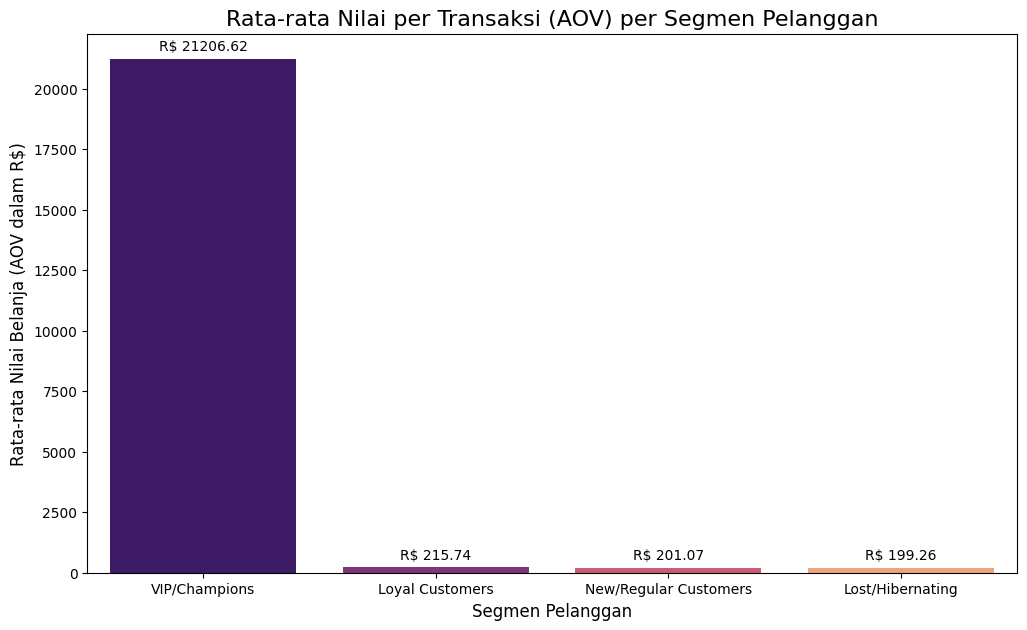

In [ ]:
cluster_profile['AOV'] = cluster_profile['Monetary'] / cluster_profile['Frequency']


# cluster_map = {0: 'New/Regular Customers', 1: 'Lost/Hibernating', 2: 'VIP/Champions', 3: 'Loyal Customers'}
cluster_profile['Segment_Name'] = cluster_profile.index.map(cluster_map)
cluster_profile.set_index('Segment_Name', inplace=True) # Jadikan nama segmen sebagai indeks baru

# Tampilkan tabel hasilnya
print("\nProfil Segmen Termasuk Average Order Value (AOV):")
display(cluster_profile.sort_values(by='AOV', ascending=False))

# visualisasi
plt.figure(figsize=(12, 7))
aov_plot = sns.barplot(
    x=cluster_profile.index,
    y=cluster_profile['AOV'],
    order=cluster_profile.sort_values(by='AOV', ascending=False).index,
    palette='magma'
)
plt.title('Rata-rata Nilai per Transaksi (AOV) per Segmen Pelanggan', fontsize=16)
plt.xlabel('Segmen Pelanggan', fontsize=12)
plt.ylabel('Rata-rata Nilai Belanja (AOV dalam R$)', fontsize=12)

# Tambahkan label angka di atas bar
for p in aov_plot.patches:
    aov_plot.annotate(f"R$ {p.get_height():.2f}",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.show()

## Evaluasi Model Clustering

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score

print("--- Memulai Evaluasi Kuantitatif Model Clustering (K-Means) ---")

# Silhouette Score (Mengukur pemisahan cluster, > 0.5 bagus)
silhouette_avg = silhouette_score(rfm_scaled, final_kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.4f}")

# Davies-Bouldin Score (Mengukur kesamaan cluster, < 1 bagus)
db_score = davies_bouldin_score(rfm_scaled, final_kmeans.labels_)
print(f"Davies-Bouldin Score: {db_score:.4f}")

# Adjusted Rand Index (Membandingkan K-Means dengan segmen manual)
ari_score = adjusted_rand_score(rfm_df['Segment'], final_kmeans.labels_)
print(f"Adjusted Rand Index (ARI) Score: {ari_score:.4f}")

--- Memulai Evaluasi Kuantitatif Model Clustering (K-Means) ---
Silhouette Score: 0.5281
Davies-Bouldin Score: 0.6058
Adjusted Rand Index (ARI) Score: 0.1855


Evaluasi kuantitatif terhadap model clustering K-Means menunjukkan performa yang solid. Model berhasil membentuk cluster yang terdefinisi dengan baik, dibuktikan oleh Silhouette Score yang baik (0.5281) dan Davies-Bouldin Score yang rendah (0.6058). Di sisi lain, Adjusted Rand Index (0.1855) yang rendah mengindikasikan bahwa pengelompokan matematis oleh model memberikan perspektif yang berbeda namun sama berharganya dibandingkan dengan segmentasi manual berbasis aturan bisnis.

## Segmentasi Manual vs. K-Means

Tabel Perbandingan Hasil Segmentasi:


Cluster_Label,Lost/Hibernating,Loyal Customers,New/Regular Customers,VIP/Champions
Segment,,,,
About to Sleep,5975,0,0,1
At Risk,3512,1308,18904,4
Champions,11129,814,0,3
Hibernating,3627,0,8218,6
Lost,0,0,12021,2
Loyal Customers,11245,787,0,3
New Customers,5929,0,0,1
Potential Loyalists,11928,0,0,2


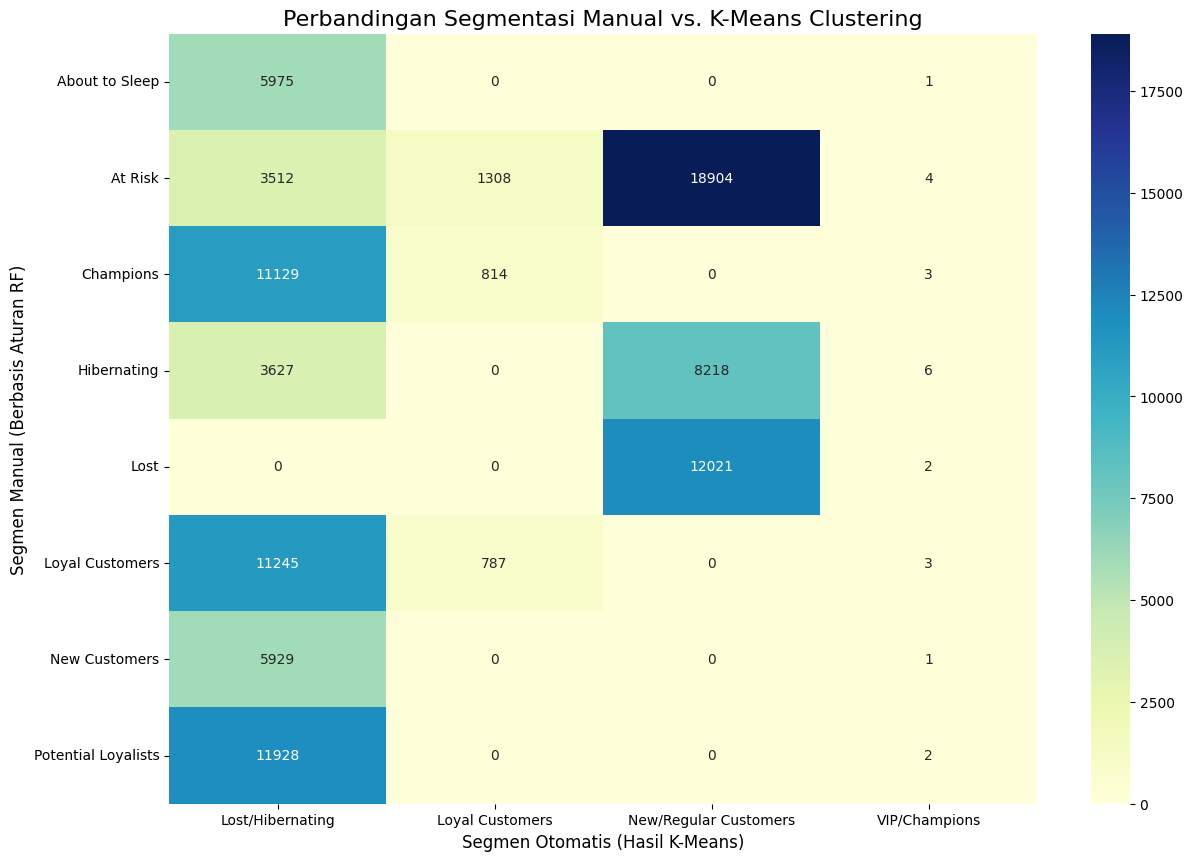

In [ ]:
# tabel perbandingan (crosstab)
# Baris: Segmen Manual, Kolom: Segmen K-Means
comparison_df = pd.crosstab(rfm_df['Segment'], rfm_df['Cluster_Label'])

print("Tabel Perbandingan Hasil Segmentasi:")
display(comparison_df)

# Visualisasikan dengan Heatmap untuk melihat polanya
plt.figure(figsize=(14, 10))
sns.heatmap(
    comparison_df,
    annot=True,
    fmt='d',
    cmap='YlGnBu'
)

plt.title('Perbandingan Segmentasi Manual vs. K-Means Clustering', fontsize=16)
plt.ylabel('Segmen Manual (Berbasis Aturan RF)', fontsize=12)
plt.xlabel('Segmen Otomatis (Hasil K-Means)', fontsize=12)
plt.show()

## Interpretasi Heatmap: Manual vs K-Means Segmentasi

Segmentasi manual (berbasis aturan) dan K-Means (berbasis data) menghasilkan hasil yang berbeda — dan itu hal yang baik. Ini menjelaskan skor ARI kita yang rendah sebelumnya, bukan karena kesalahan, tapi karena kedua pendekatan melihat pelanggan dari sudut pandang berbeda.

### 1. K-Means Menggabungkan Segmen Manual
- Contoh: Pelanggan manual segmen At Risk, Hibernating, dan Lost banyak tergabung ke satu cluster besar (New/Regular atau Lost/Hibernating) oleh K-Means.
- Artinya: Secara matematis, karakteristik mereka mirip — mungkin karena Recency yang tinggi.

### 2. Kesamaan pada Segmen Aktif
- Contoh: Cluster Loyal Customers (K-Means) banyak diisi oleh segmen manual Champions dan At Risk.
- Artinya: Kedua pendekatan mengenali bahwa pelanggan aktif dan sering belanja adalah kelompok khusus.

### 3. Kekuatan Gabungan Dua Pendekatan
- **Segmentasi Manual**: Cocok untuk kebutuhan marketing yang spesifik (misal kampanye re-engagement ke At Risk).
- **K-Means**: Menemukan pola tersembunyi di data secara objektif.

## Inti Pesan untuk Presentasi
"Segmentasi manual memberikan presisi untuk aksi marketing. Sementara K-Means memberi pandangan objektif tentang struktur keseluruhan data. Keduanya saling melengkapi dan memberi insight 360 derajat terhadap pelanggan kami."


# Modeling

## Menentukan Periode Waktu

In [ ]:
# Periode Observasi: Semua data sebelum 1 Maret 2018
# Periode Prediksi: 6 bulan setelah 1 Maret 2018

snapshot_data = pd.to_datetime('2018-03-01')
prediction_window = 180 # 6 bulan dalam hari

print(f"Tanggal snapshot (akhir periode observasi): {snapshot_date.date()}")
print(f"Panjang jendela prediksi: {prediction_window} hari")

Tanggal snapshot (akhir periode observasi): 2018-09-04
Panjang jendela prediksi: 180 hari


## Feature Engineering pada Periode Observasi

In [ ]:
# Filter main_df untuk mendapatkan data hanya dari periode observasi
observation_df = main_df[main_df['order_purchase_timestamp'] < snapshot_date]

# Hitung RFM berdasarkan data di periode observasi
rfm_features = observation_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,
    'order_id': 'nunique',
    'payment_value': 'sum'
}).rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'payment_value': 'Monetary'
})

print("Fitur RFM berdasarkan periode observasi berhasil dibuat:")
display(rfm_features.head())

Fitur RFM berdasarkan periode observasi berhasil dibuat:


,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19
0000f46a3911fa3c0805444483337064,542,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62
0004aac84e0df4da2b147fca70cf8255,293,1,196.89


## Membuat Label Target (y) dari Periode Prediksi

In [ ]:
# Tentukan tanggal mulai dan akhir dari periode prediksi
prediction_start_date = snapshot_data
prediction_end_date = snapshot_data + pd.Timedelta(days=prediction_window)

# Filter main_df untuk mendapatkan transaksi di periode prediksi
prediction_df = main_df[
    (main_df['order_purchase_timestamp'] >= prediction_start_date) &
    (main_df['order_purchase_timestamp'] < prediction_end_date)
]

# Dapatkan daftar pelanggan yang AKTIF selama periode prediksi
active_customers = prediction_df['customer_unique_id'].unique()

# buat label target 'is_churn'
# Jika customer_unique_id ada di daftar 'active_customers', maka dia TIDAK churn (0)
rfm_features['is_churn'] = 1 # Anggap semua churn dulu
rfm_features.loc[rfm_features.index.isin(active_customers), 'is_churn'] = 0 # Lalu set yang tidak churn menjadi 0

print("\nDistribusi Label Churn yang Baru:")
print(rfm_features['is_churn'].value_counts())
# 1 = Churn, 0 = Tidak Churn


Distribusi Label Churn yang Baru:
is_churn
1    56304
0    39115
Name: count, dtype: int64


## Melatih & Mengevaluasi Model


--- Melatih Model Logistic Regression ---
Classification Report untuk Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7823
           1       1.00      1.00      1.00     11261

    accuracy                           1.00     19084
   macro avg       1.00      1.00      1.00     19084
weighted avg       1.00      1.00      1.00     19084


--- Melatih Model Random Forest ---
Classification Report untuk Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7823
           1       1.00      1.00      1.00     11261

    accuracy                           1.00     19084
   macro avg       1.00      1.00      1.00     19084
weighted avg       1.00      1.00      1.00     19084



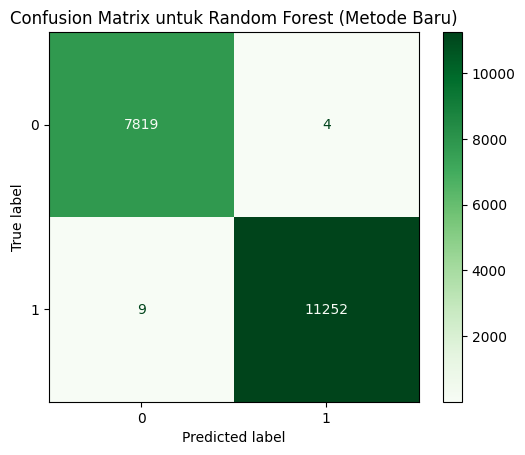

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Definisikan X dan y
X = rfm_features[['Recency', 'Frequency', 'Monetary']]
y = rfm_features['is_churn']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Model 1: Logistic Regression (Baseline) ---
print("\n--- Melatih Model Logistic Regression ---")
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)
print("Classification Report untuk Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))

# --- Model 2: Random Forest ---
print("\n--- Melatih Model Random Forest ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Classification Report untuk Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Visualisasi Confusion Matrix untuk model terbaik (Random Forest)
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Greens')
plt.title('Confusion Matrix untuk Random Forest (Metode Baru)')
plt.show()

Hasil aneh, ga wajar kalo sempurna gini

/tmp/ipython-input-874986144.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rfm_features, x='is_churn', y='Recency', palette='viridis')


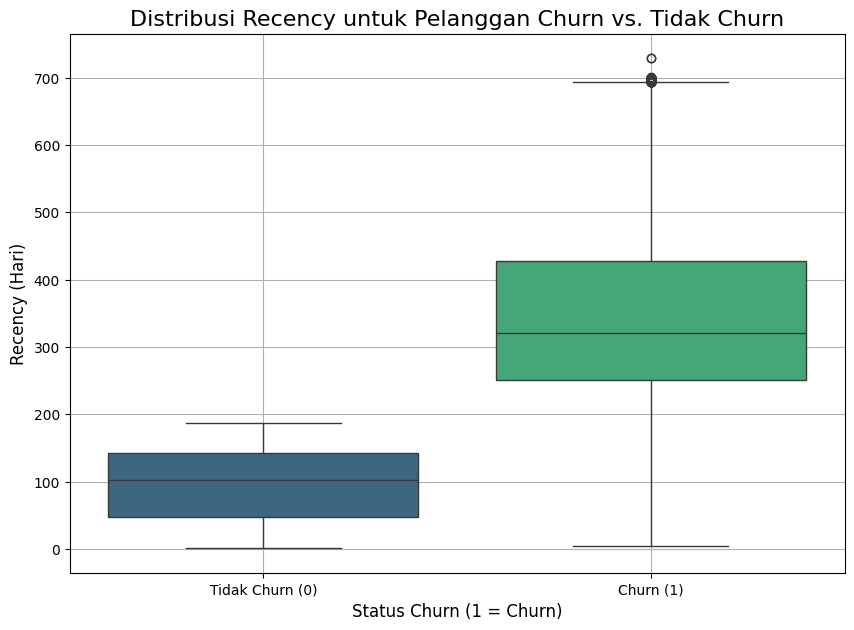

In [ ]:
# Visualisasikan distribusi Recency untuk setiap kelas target
plt.figure(figsize=(10, 7))
sns.boxplot(data=rfm_features, x='is_churn', y='Recency', palette='viridis')
plt.title('Distribusi Recency untuk Pelanggan Churn vs. Tidak Churn', fontsize=16)
plt.xlabel('Status Churn (1 = Churn)', fontsize=12)
plt.ylabel('Recency (Hari)', fontsize=12)
plt.xticks([0, 1], ['Tidak Churn (0)', 'Churn (1)'])
plt.grid(True)
plt.show()

In [ ]:
# Coba latih ulang
# Definisikan X baru tanpa Recency
X_no_recency = rfm_features[['Frequency', 'Monetary']]
y = rfm_features['is_churn']

# Train-Test Split lagi
X_train_nr, X_test_nr, y_train_nr, y_test_nr = train_test_split(X_no_recency, y, test_size=0.2, random_state=42, stratify=y)

# Latih ulang Random Forest
rf_model_nr = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model_nr.fit(X_train_nr, y_train_nr)

# Evaluasi
y_pred_rf_nr = rf_model_nr.predict(X_test_nr)
print("Classification Report untuk Random Forest (TANPA Recency):")
print(classification_report(y_test_nr, y_pred_rf_nr))

Classification Report untuk Random Forest (TANPA Recency):
              precision    recall  f1-score   support

           0       0.70      0.66      0.68      7823
           1       0.77      0.80      0.79     11261

    accuracy                           0.74     19084
   macro avg       0.74      0.73      0.73     19084
weighted avg       0.74      0.74      0.74     19084



In [ ]:
# Latih ulang Logistic Regression tanpa Recency
print("--- Melatih Ulang Model Logistic Regression (TANPA Recency) ---")
log_reg_model_nr = LogisticRegression(random_state=42)
log_reg_model_nr.fit(X_train_nr, y_train_nr)

# Evaluasi
y_pred_log_reg_nr = log_reg_model_nr.predict(X_test_nr)
print("Classification Report untuk Logistic Regression (TANPA Recency):")
print(classification_report(y_test_nr, y_pred_log_reg_nr))

# Tampilkan kembali hasil Random Forest untuk perbandingan langsung
print("\n--- Hasil Model Random Forest (TANPA Recency) ---")
print("Classification Report untuk Random Forest (TANPA Recency):")
print(classification_report(y_test_nr, y_pred_rf_nr))



--- Melatih Ulang Model Logistic Regression (TANPA Recency) ---
Classification Report untuk Logistic Regression (TANPA Recency):
              precision    recall  f1-score   support

           0       0.54      0.00      0.00      7823
           1       0.59      1.00      0.74     11261

    accuracy                           0.59     19084
   macro avg       0.56      0.50      0.37     19084
weighted avg       0.57      0.59      0.44     19084


--- Hasil Model Random Forest (TANPA Recency) ---
Classification Report untuk Random Forest (TANPA Recency):
              precision    recall  f1-score   support

           0       0.70      0.66      0.68      7823
           1       0.77      0.80      0.79     11261

    accuracy                           0.74     19084
   macro avg       0.74      0.73      0.73     19084
weighted avg       0.74      0.74      0.74     19084



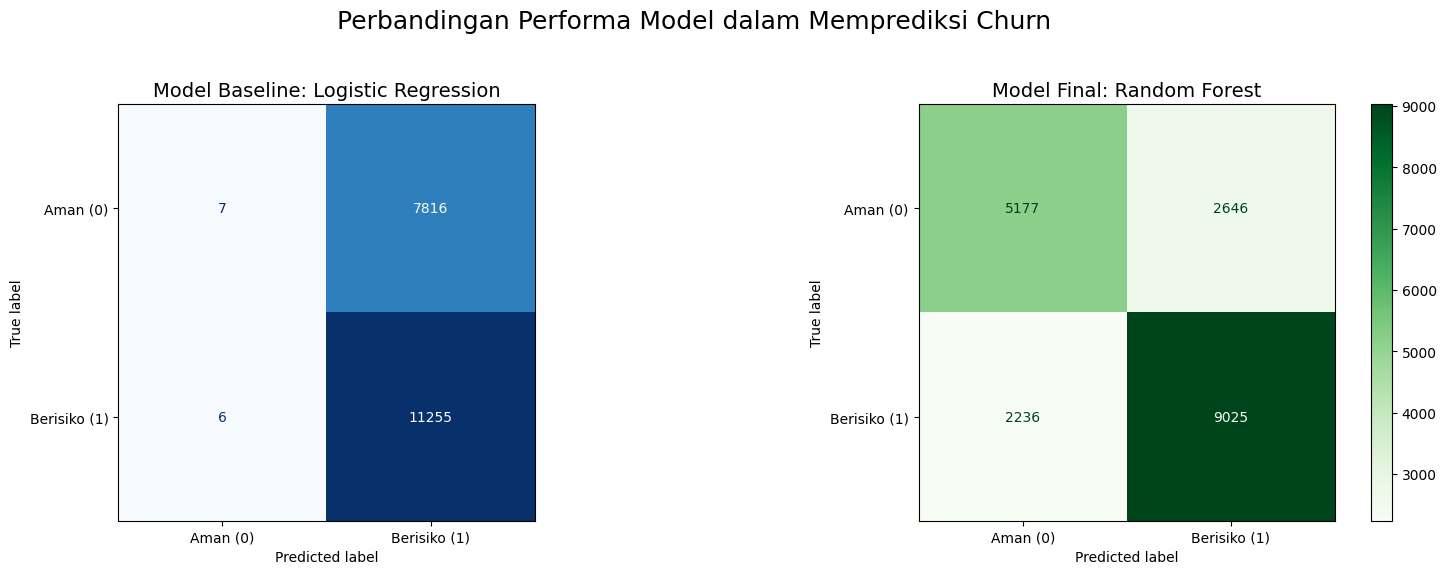

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Perbandingan Performa Model dalam Memprediksi Churn', fontsize=18)

# --- Confusion Matrix untuk Logistic Regression ---
axes[0].set_title('Model Baseline: Logistic Regression', fontsize=14)
cm_log_reg = confusion_matrix(y_test_nr, y_pred_log_reg_nr)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=['Aman (0)', 'Berisiko (1)'])
disp_log_reg.plot(ax=axes[0], cmap='Blues', colorbar=False) # colorbar=False agar tidak duplikat

# --- Confusion Matrix untuk Random Forest ---
axes[1].set_title('Model Final: Random Forest', fontsize=14)
cm_rf = confusion_matrix(y_test_nr, y_pred_rf_nr)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Aman (0)', 'Berisiko (1)'])
disp_rf.plot(ax=axes[1], cmap='Greens') # Tampilkan colorbar di sini

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Eksperimen Model: Pengaruh Fitur Recency

### Iterasi Awal: Hasil Terlalu Bagus (100%)

Awalnya, saat aku melatih model menggunakan ketiga fitur RFM (Recency, Frequency, Monetary), hasilnya mengejutkan: baik Logistic Regression maupun Random Forest menunjukkan akurasi 100%.

Tapi menurutku ini terlalu bagus untuk jadi kenyataan.

Setelah aku cek lebih lanjut, ternyata fitur Recency terlalu dominan dan memberikan sinyal yang sangat kuat. Kemungkinan besar ini menyebabkan overfitting, di mana model terlalu bergantung pada satu fitur saja.

---

### Melatih Ulang TANPA Recency

Agar hasilnya lebih realistis, aku mencoba menghapus Recency dan hanya menggunakan Frequency dan Monetary saja.

**Hasil Random Forest (tanpa Recency):**
- Akurasi: 74%
- Recall churn: 80%
- Precision churn: 77%

Model ini masih mampu mengenali pelanggan berisiko dengan cukup baik dan hasilnya terasa lebih masuk akal.

---

### Perbandingan Logistic vs Random Forest (tanpa Recency)

Untuk memastikan perbandingan yang adil, aku juga melatih ulang Logistic Regression tanpa fitur Recency.

- Logistic Regression gagal menangkap pola yang berarti (Recall churn = 100%, tapi Precision = 59%), yang menunjukkan bahwa hubungan antara fitur dan churn bersifat kompleks dan tidak linear.
- Random Forest justru mampu mengenali pola tersebut dengan lebih baik dan memberikan prediksi yang lebih stabil.

---

### Kesimpulan

- Fitur Recency terlalu dominan, membuat model awal menjadi overfitting.
- Setelah dihapus, performa model jadi lebih seimbang dan realistis.
- Aku memilih Random Forest (tanpa Recency) sebagai model final karena hasilnya paling stabil dan dapat diandalkan untuk kebutuhan deployment di aplikasi web yang aku bangun.


# Tuning?

In [ ]:
# # Menyiapkan Parameter Grid
# from sklearn.model_selection import RandomizedSearchCV

# # Menyusun parameter grid yang akan diuji secara acak oleh RandomizedSearchCV.
# # Parameter-parameter ini dipilih karena sering digunakan dalam proses tuning model Random Forest.
# param_dist = {
#     'n_estimators': [100, 200, 300],  # Jumlah estimators (pohon) yang akan dibangun oleh model
#     'max_depth': [10, 20, 30, None],  # Batas kedalaman maksimal pohon; None berarti tidak dibatasi
#     'min_samples_split': [2, 5, 10],  # Minimum jumlah sampel yang dibutuhkan untuk melakukan split
#     'min_samples_leaf': [1, 2, 4],    # Minimum jumlah sampel yang harus ada pada daun (leaf) pohon
#     'bootstrap': [True, False]        # Opsi penggunaan bootstrap samples saat membangun pohon
# }


In [ ]:
# # Inisialisasi model Random Forest (kosong)
# rf = RandomForestClassifier(random_state=42)

# # Inisialisasi RandomizedSearchCV
# # n_iter=50 -> mencoba 50 kombinasi
# # cv=5 -> menggunakan 5-fold cross-validation
# # n_jobs=-1 -> menggunakan semua core CPU agar lebih cepat
# rf_random_search = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_dist,
#     n_iter=50,
#     cv=5,
#     verbose=2,
#     random_state=42,
#     n_jobs=-1
# )

# # Latih pencarian pada data training (tanpa Recency)
# print("Memulai Hyperparameter Tuning...")
# rf_random_search.fit(X_train_nr, y_train_nr)

# print("\nTuning selesai!")

Coba tuning tetapi memakan waktu lama menggunakan RandomForest, jadi aku drop dulu proses ini dan mencoba menggunakan Optuna

In [ ]:
!pip install optuna

import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Fungsi objektif yang digunakan oleh Optuna untuk mencari kombinasi hyperparameter terbaik
def objective(trial):
    # Menentukan rentang hyperparameter yang akan dieksplorasi selama proses optimasi
    n_estimators = trial.suggest_int('n_estimators', 50, 400)
    max_depth = trial.suggest_int('max_depth', 4, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 16)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 16)

    # Inisialisasi model Random Forest dengan hyperparameter dari trial saat ini
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1
    )

    # Evaluasi performa model menggunakan cross-validation sebanyak 3 fold
    score = cross_val_score(model, X_train_nr, y_train_nr, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy

# Membuat objek studi Optuna dan mulai proses tuning dengan tujuan memaksimalkan akurasi
study = optuna.create_study(direction='maximize')
print("Memulai proses hyperparameter tuning dengan Optuna...")

# Menjalankan proses optimasi dengan mencoba 30 kombinasi hyperparameter yang dipilih secara cerdas
study.optimize(objective, n_trials=30)
print("\nTuning selesai!")

# Mengambil hasil terbaik dari proses tuning
best_params = study.best_params
print(f"\nSkor cross-validation terbaik: {study.best_value:.4f}")
print("Hyperparameter terbaik yang ditemukan:")
print(best_params)

# Melatih kembali model Random Forest menggunakan kombinasi hyperparameter terbaik
final_tuned_model = RandomForestClassifier(random_state=42, n_jobs=-1, **best_params)
final_tuned_model.fit(X_train_nr, y_train_nr)

# Mengevaluasi performa model hasil tuning pada data uji
print("\n--- Evaluasi Model Final (Setelah Tuning Optuna) ---")
y_pred_tuned = final_tuned_model.predict(X_test_nr)
print("\nClassification Report - Random Forest (Setelah Tuning):")
print(classification_report(y_test_nr, y_pred_tuned))

# Sebagai perbandingan, tampilkan juga performa model sebelum tuning
print("\nClassification Report - Random Forest (Sebelum Tuning):")
print(classification_report(y_test_nr, y_pred_rf_nr))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 24.5 MB/s eta 0:00:00


[I 2025-08-03 05:52:19,048] A new study created in memory with name: no-name-83909d7c-c55d-4578-b2dd-23f6c1f80322


Memulai proses hyperparameter tuning dengan Optuna...


[I 2025-08-03 05:54:55,607] Trial 0 finished with value: 0.6912687495906202 and parameters: {'n_estimators': 380, 'max_depth': 32, 'min_samples_split': 7, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.6912687495906202.
[I 2025-08-03 05:55:48,818] Trial 1 finished with value: 0.6568939542804743 and parameters: {'n_estimators': 185, 'max_depth': 18, 'min_samples_split': 12, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.6912687495906202.
[I 2025-08-03 05:56:31,754] Trial 2 finished with value: 0.6429553939870308 and parameters: {'n_estimators': 164, 'max_depth': 16, 'min_samples_split': 13, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.6912687495906202.
[I 2025-08-03 05:58:21,860] Trial 3 finished with value: 0.6860810899325341 and parameters: {'n_estimators': 296, 'max_depth': 27, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.6912687495906202.
[I 2025-08-03 06:00:52,742] Trial 4 finished with value: 0.7007532586624746 and paramet


Tuning selesai!

Skor cross-validation terbaik: 0.7197
Hyperparameter terbaik yang ditemukan:
{'n_estimators': 218, 'max_depth': 32, 'min_samples_split': 5, 'min_samples_leaf': 2}

--- Evaluasi Model Final (Setelah Tuning Optuna) ---

Classification Report - Random Forest (Setelah Tuning):
              precision    recall  f1-score   support

           0       0.72      0.57      0.64      7823
           1       0.74      0.85      0.79     11261

    accuracy                           0.73     19084
   macro avg       0.73      0.71      0.71     19084
weighted avg       0.73      0.73      0.73     19084


Classification Report - Random Forest (Sebelum Tuning):
              precision    recall  f1-score   support

           0       0.70      0.66      0.68      7823
           1       0.77      0.80      0.79     11261

    accuracy                           0.74     19084
   macro avg       0.74      0.73      0.73     19084
weighted avg       0.74      0.74      0.74     1908

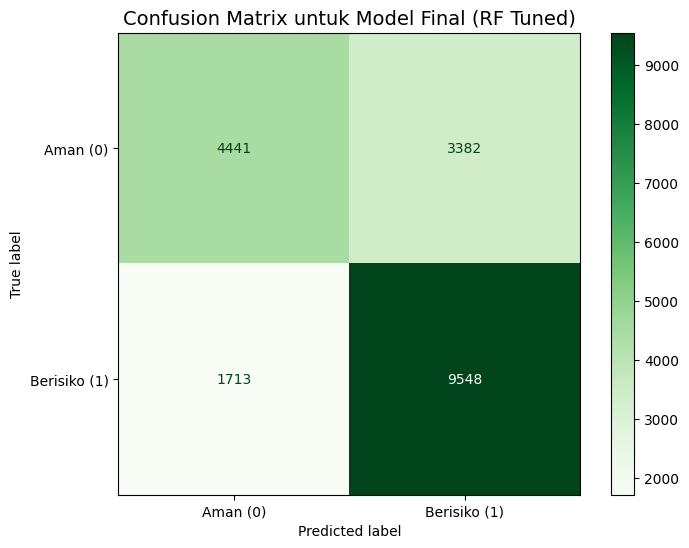

In [ ]:
# Hitung confusion matrix
cm_tuned = confusion_matrix(y_test_nr, y_pred_tuned)

# Visualisasikan confusion matrix
disp_tuned = ConfusionMatrixDisplay(
    confusion_matrix=cm_tuned,
    display_labels=['Aman (0)', 'Berisiko (1)']
)

# Tampilkan plot
fig, ax = plt.subplots(figsize=(8, 6))
disp_tuned.plot(ax=ax, cmap='Greens')
plt.title('Confusion Matrix untuk Model Final (RF Tuned)', fontsize=14)
plt.show()

## Kesimpulan Setelah Tuning

### Perbandingan Kinerja Model: Sebelum vs. Setelah Tuning

### Fokus pada Kelas Berisiko (1):
- Recall meningkat dari 80% ke 85%
   -> Model menjadi lebih sensitif dalam mendeteksi pelanggan yang akan churn.
- Precision menurun dari 77% ke 74%
   -> Terjadi sedikit peningkatan false positive, yaitu pelanggan aman yang diprediksi akan churn.
- Akurasi total sedikit menurun dari 74% ke 73%

### Implikasi Bisnis:
- Nilai positif: Model lebih baik dalam menangkap pelanggan yang benar-benar akan churn, sehingga potensi kehilangan pelanggan bisa ditekan.
- Konsekuensi: Model juga menjadi sedikit lebih agresif dalam prediksi,
  menghasilkan lebih banyak peringatan palsu (false positive).

### Kesimpulan:
Trade-off ini cukup masuk akal, terutama jika tujuan utama adalah meningkatkan retensi pelanggan.
Lebih baik mencegah churn meskipun ada beberapa pelanggan yang sebenarnya aman namun ikut ditindaklanjuti.


# Mengekspor Model & Data Final

In [ ]:
import joblib

# Simpan model Random Forest yang sudah di-tuning
# Kita beri nama yang jelas untuk membedakannya
file_model = 'final_rf_model_tuned.joblib'
joblib.dump(final_tuned_model, file_model)

print(f"Model final berhasil disimpan sebagai: '{file_model}'")


# Simpan DataFrame RFM final yang sudah lengkap dengan semua segmen
# File ini akan digunakan oleh aplikasi web untuk dashboard dan lookup data
file_data = 'final_rfm_data_for_app.csv'
rfm_df.to_csv(file_data, index_label='customer_unique_id')

print(f"Data pelanggan final berhasil disimpan sebagai: '{file_data}'")

Model final berhasil disimpan sebagai: 'final_rf_model_tuned.joblib'
Data pelanggan final berhasil disimpan sebagai: 'final_rfm_data_for_app.csv'


In [ ]:
# Tentukan kolom-kolom yang dibutuhkan oleh dashboard
# Ini termasuk data untuk analisis geografis, produk, dan kepuasan.
columns_for_app = [
    'order_id',
    'customer_unique_id',
    'customer_state',
    'payment_value',
    'product_category_name_english',
    'review_score',
    'order_purchase_timestamp',
    'order_delivered_customer_date'
]

# Buat DataFrame baru yang hanya berisi kolom-kolom tersebut
main_df_for_app = main_df[columns_for_app]

# Simpan DataFrame baru ini ke file CSV
file_path = 'main_df_for_app.csv'
main_df_for_app.to_csv(file_path, index=False)

print(f"DataFrame utama untuk aplikasi berhasil disimpan sebagai: '{file_path}'")

DataFrame utama untuk aplikasi berhasil disimpan sebagai: 'main_df_for_app.csv'


In [ ]:
# Ambil kolom is_churn dari rfm_features yang sudah kita buat
churn_labels = rfm_features[['is_churn']]

# Gabungkan ke rfm_df utama kita yang berisi semua label segmentasi
# Gunakan left join agar semua pelanggan di rfm_df tetap ada
rfm_df_final_for_app = rfm_df.merge(churn_labels, on='customer_unique_id', how='left')

# Pelanggan yang tidak ada di periode observasi model tidak akan punya label churn.
# Kita bisa asumsikan mereka aman (0) atau statusnya belum ditentukan. Mengisi dengan 0 adalah pilihan aman.
rfm_df_final_for_app['is_churn'].fillna(0, inplace=True)
rfm_df_final_for_app['is_churn'] = rfm_df_final_for_app['is_churn'].astype(int)


# Simpan file final ini
final_csv_path = 'final_customer_data.csv'
rfm_df_final_for_app.to_csv(final_csv_path, index_label='customer_unique_id')

print(f"Data final untuk aplikasi berhasil disimpan sebagai: '{final_csv_path}'")
display(rfm_df_final_for_app.head())

/tmp/ipython-input-2482361161.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rfm_df_final_for_app['is_churn'].fillna(0, inplace=True)


Data final untuk aplikasi berhasil disimpan sebagai: 'final_customer_data.csv'


,Recency,Frequency,Monetary,customer_type,R_Score,F_Score,M_Score,RF_Score,Segment,Cluster,Cluster_Label,is_churn
customer_unique_id,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,Pelanggan Sekali Beli,4,1,3,41,New Customers,0,Lost/Hibernating,0
0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,Pelanggan Sekali Beli,4,1,1,41,New Customers,0,Lost/Hibernating,0
0000f46a3911fa3c0805444483337064,542,1,86.22,Pelanggan Sekali Beli,1,1,2,11,Lost,1,New/Regular Customers,1
0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,Pelanggan Sekali Beli,2,1,1,21,Hibernating,1,New/Regular Customers,1
0004aac84e0df4da2b147fca70cf8255,293,1,196.89,Pelanggan Sekali Beli,2,1,3,21,Hibernating,1,New/Regular Customers,1


In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYR